In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from IPython.core.display import display, HTML
plt.rcParams.update({'figure.max_open_warning': 0})
display(HTML("<style>.container { width:80% !important; }</style>"))

TO DO:
* calculate mean for the indicators
* compare mean with chosen company
* compare indicators for chosen companies
* automate finding companies with the best fundamentals

# Prepare data

Fundamental indicators have been web scraped from https://www.biznesradar.pl/wskazniki-wartosci-rynkowej/DNP (address leads to Dino PL data as a example). Ways of calculating the indicators can be seen there. The web scraper code can be found in */Data/Web_scraper_for_fundamental_indicators.py*

Stock data (daily prices and volume) have been automatically downloaded from https://stooq.pl. Script used for downloading can be found in */Data/stock_data_downloader.py*|

In [2]:
directory = "Data/Daily_data"
stock_data = pd.DataFrame(columns=['Data', 'Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen'])
stock_list = ['ACP', 'ALE', 'ALR', 'CCC', 'CDR', 'CPS', 'DNP', 'JSW', 'KGHM', 'LPP', 'LTS', 'MRC', 'OPL', 'PEO', 'PGE', 'PGN', 'PKN', 'PKO', 'PZU', 'SPL', 'TPE']
i = 0

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    single_stock_data = pd.read_csv(file_path)
#     single_stock_data = single_stock_data.rename(columns={'Data': 'Date', 'Otwarcie': 'Open', 'Najwyzszy': 'Highest', 'Najnizszy': 'Lowest', 'Zamkniecie': 'Close', 'Wolumen': 'Volume'})
    single_stock_data['Data'] = pd.to_datetime(single_stock_data.Data)
    single_stock_data['Spółka'] = stock_list[i]
    stock_data = stock_data.append(single_stock_data, ignore_index=True)
    i += 1
    print('Loaded file: ' + filename)

Loaded file: acp_d.csv
Loaded file: ale_d.csv
Loaded file: alr_d.csv
Loaded file: ccc_d.csv
Loaded file: cdr_d.csv
Loaded file: cps_d.csv
Loaded file: dnp_d.csv
Loaded file: jsw_d.csv
Loaded file: kgh_d.csv
Loaded file: lpp_d.csv
Loaded file: lts_d.csv
Loaded file: mrc_d.csv
Loaded file: opl_d.csv
Loaded file: peo_d.csv
Loaded file: pge_d.csv
Loaded file: pgn_d.csv
Loaded file: pkn_d.csv
Loaded file: pko_d.csv
Loaded file: pzu_d.csv
Loaded file: san_d.csv
Loaded file: tpe_d.csv


In [3]:
stock_data.head()

Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie Wolumen Spółka
0 1998-06-02    10.602     10.602     10.602      10.602  577707    ACP
1 1998-06-03    11.648     11.648     11.648      11.648  221464    ACP
2 1998-06-04    12.694     12.694     12.694      12.694  655891    ACP
3 1998-06-05    12.847     12.847     12.847      12.847  252087    ACP
4 1998-06-08    12.794     12.794     12.794      12.794  141804    ACP

In [4]:
fundamental_data = pd.read_csv('Data/WiG20_fundamental_indicators.csv')
fundamental_data.head()

Spółka Kwartały Wartość księgowa  Cena/WK  Zysk na akcję Cena/Zysk Przychód  \
0    ACP  2004/Q4             6.55     4.26           0.02  1 313.53    23.01   
1    ACP  2005/Q4            11.27     3.46           1.75     22.32    21.18   
2    ACP  2006/Q1            11.50     3.30           1.86     20.40    21.42   
3    ACP  2006/Q2            11.24     3.21           1.60     22.52    22.77   
4    ACP  2006/Q3            12.43     3.22           2.27     17.60    24.26   

   Cena/Przychód  Zysk operacyjny  Cena/Zysk operacyjny  ...  \
0           1.21             1.03                 27.17  ...   
1           1.84             2.06                 18.94  ...   
2           1.77             2.27                 16.70  ...   
3           1.59             1.77                 20.41  ...   
4           1.65             1.64                 24.33  ...   

  Rotacja należności Cykl należności Cykl zobowiązań  Rotacja zapasów  \
0               2.89             126             229            19.74   
1               3.46             105             145            20.74   
2               3.41             107             139            19.01   
3               3.51             104             134            20.23   
4               3.67             100             130            23.43   

   Cykl zapasów  Rotacja majątku obrotowego Rotacja majątku trwałego  \
0          18.0                        1.66                     2.00   
1          18.0                        1.96                     2.10   
2          19.0                        1.94                     1.93   
3          18.0                        1.92                     1.94   
4          16.0                        1.95                     2.01   

  Rotacja majątku ogółem Cykl operacyjny Cykl konwersji gotówki  
0                   0.91             144                    -85  
1                   1.01             123                    -22  
2                   0.97             126                    -13  
3                   0.96             122                    -12  
4                   0.99             116                    -14  

[5 rows x 57 columns]

In [5]:
fundamental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 57 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Spółka                                         1100 non-null   object 
 1   Kwartały                                       1100 non-null   object 
 2   Wartość księgowa                               1100 non-null   object 
 3   Cena/WK                                        1068 non-null   float64
 4   Zysk na akcję                                  1100 non-null   float64
 5   Cena/Zysk                                      956 non-null    object 
 6   Przychód                                       1100 non-null   object 
 7   Cena/Przychód                                  1070 non-null   float64
 8   Zysk operacyjny                                1100 non-null   float64
 9   Cena/Zysk operacyjny                           979 n

In [6]:
for column in fundamental_data.columns:
    if column in ['Spółka', 'Kwartały'] or fundamental_data[column].dtype == np.float64:
        pass
    else:
#         print(column)
        fundamental_data[column] = fundamental_data[column].astype(str).str.replace(" ","")
        fundamental_data[column] = pd.to_numeric(fundamental_data[column], errors='coerce')

In [7]:
fundamental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 57 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Spółka                                         1100 non-null   object 
 1   Kwartały                                       1100 non-null   object 
 2   Wartość księgowa                               1100 non-null   float64
 3   Cena/WK                                        1068 non-null   float64
 4   Zysk na akcję                                  1100 non-null   float64
 5   Cena/Zysk                                      956 non-null    float64
 6   Przychód                                       1100 non-null   float64
 7   Cena/Przychód                                  1070 non-null   float64
 8   Zysk operacyjny                                1100 non-null   float64
 9   Cena/Zysk operacyjny                           979 n

In [18]:
# adding average column values for comparision
mean_data = fundamental_data.groupby('Kwartały').mean()
mean_data['Kwartały'] = mean_data.index
mean_data['Spółka'] = 'AVG'
fundamental_data = pd.concat([fundamental_data, mean_data], ignore_index=True)



# changing quarters to approximited dates of publish
fundamental_data['Data'] = pd.to_datetime({'year': fundamental_data['Kwartały'].str[:4],
                                         'month': fundamental_data['Kwartały'].str[-1].map({'1':5, '2':8, '3':11, '4':2}),
                                         'day': 1}, format='%d/%m/%Y')

# limit the Dates only to the ones starting a year so the graphs keep a clean look
# fundamental_data['Data_wykres'] = [int(x[:4]) + 1 if x[-1] == '4' else '' for x in fundamental_data['Kwartały']]


# yearly reports are published in the following year, so we need to update the dates
fundamental_data.loc[fundamental_data['Kwartały'].str[-1] == '4', 'Data'] = fundamental_data['Data'] + pd.offsets.DateOffset(years=1)

In [9]:
fundamental_data.head()

Spółka Kwartały  Wartość księgowa  Cena/WK  Zysk na akcję  Cena/Zysk  \
0    ACP  2004/Q4              6.55     4.26           0.02    1313.53   
1    ACP  2005/Q4             11.27     3.46           1.75      22.32   
2    ACP  2006/Q1             11.50     3.30           1.86      20.40   
3    ACP  2006/Q2             11.24     3.21           1.60      22.52   
4    ACP  2006/Q3             12.43     3.22           2.27      17.60   

   Przychód  Cena/Przychód  Zysk operacyjny  Cena/Zysk operacyjny  ...  \
0     23.01           1.21             1.03                 27.17  ...   
1     21.18           1.84             2.06                 18.94  ...   
2     21.42           1.77             2.27                 16.70  ...   
3     22.77           1.59             1.77                 20.41  ...   
4     24.26           1.65             1.64                 24.33  ...   

   Cykl należności  Cykl zobowiązań  Rotacja zapasów  Cykl zapasów  \
0            126.0            229.0            19.74          18.0   
1            105.0            145.0            20.74          18.0   
2            107.0            139.0            19.01          19.0   
3            104.0            134.0            20.23          18.0   
4            100.0            130.0            23.43          16.0   

   Rotacja majątku obrotowego  Rotacja majątku trwałego  \
0                        1.66                      2.00   
1                        1.96                      2.10   
2                        1.94                      1.93   
3                        1.92                      1.94   
4                        1.95                      2.01   

   Rotacja majątku ogółem  Cykl operacyjny  Cykl konwersji gotówki       Data  
0                    0.91            144.0                   -85.0 2005-02-01  
1                    1.01            123.0                   -22.0 2006-02-01  
2                    0.97            126.0                   -13.0 2006-05-01  
3                    0.96            122.0                   -12.0 2006-08-01  
4                    0.99            116.0                   -14.0 2006-11-01  

[5 rows x 58 columns]

# Visualise fundamental indicators for single company

In [10]:
def plot_fundamental_indicators(stock_idx, indicator):
    start_year = int(fundamental_data.loc[fundamental_data['Spółka'] == stock_idx, 'Kwartały'].iloc[0][:4])
    stock_price = stock_data.loc[(stock_data['Spółka'] == stock_idx) & (stock_data['Data'] > pd.Timestamp(start_year, 1, 1)), ['Data', 'Zamkniecie']]
    
    if fundamental_data.loc[fundamental_data['Spółka'] == stock_idx, indicator].sum() == 0:
        print('No data for ' + stock_idx + ' ' + indicator)
        return 0
    
    fig, ax1 = plt.subplots(figsize=(20,8))
    ax1.bar(fundamental_data.loc[fundamental_data['Spółka'] == stock_idx, 'Data'], fundamental_data.loc[fundamental_data['Spółka'] == stock_idx, indicator], width=80)
    ax1.set_xlabel('Data', fontsize=25)
    ax1.set_ylabel(indicator, fontsize=25)
    ax1.set_title(indicator + ' spółki ' + stock_idx, fontsize=40)

    ax2 = ax1.twinx()
    ax2.plot(stock_price['Data'], stock_price['Zamkniecie'], color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylabel('Cena akcji [zł]', color='r', fontsize=25);

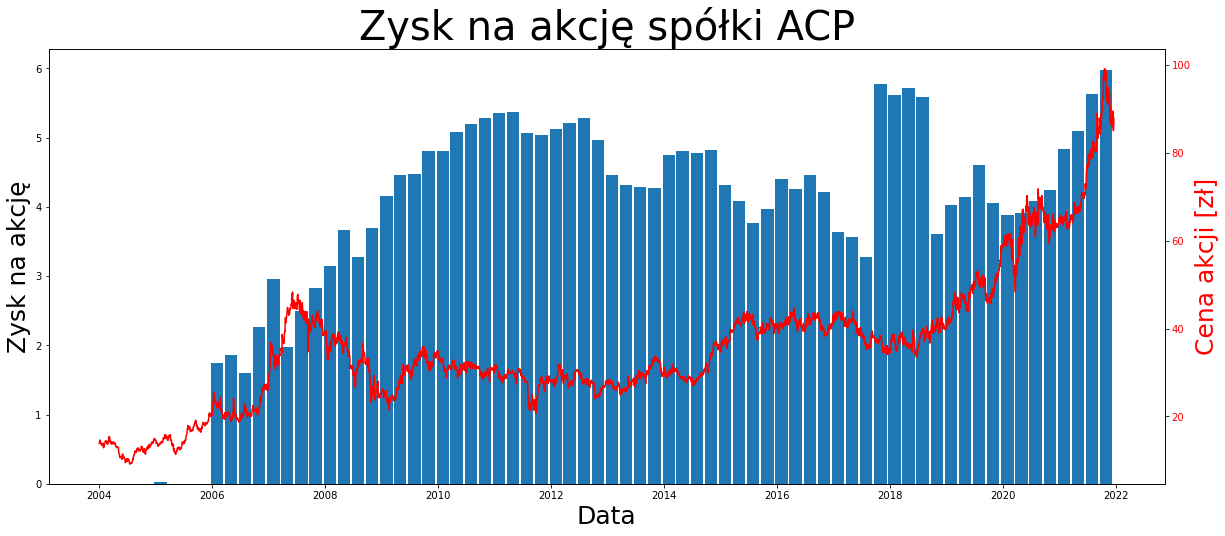

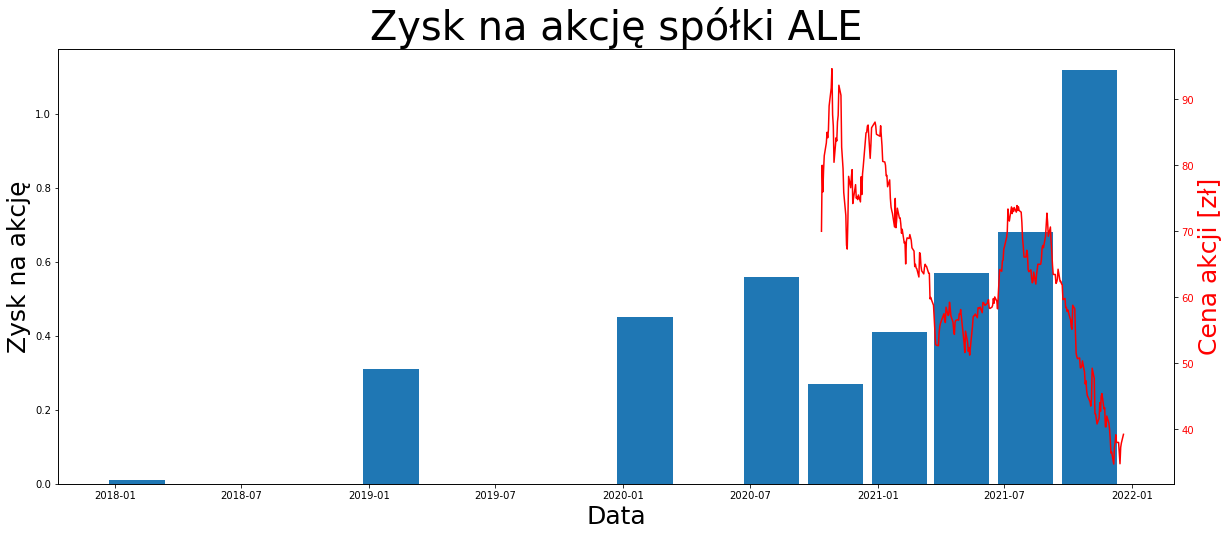

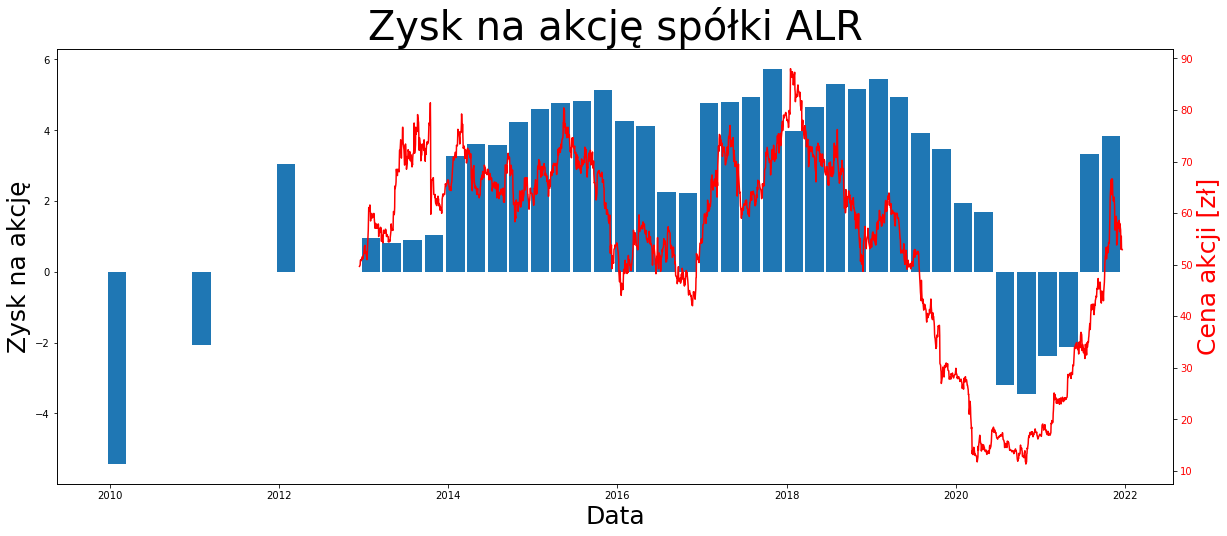

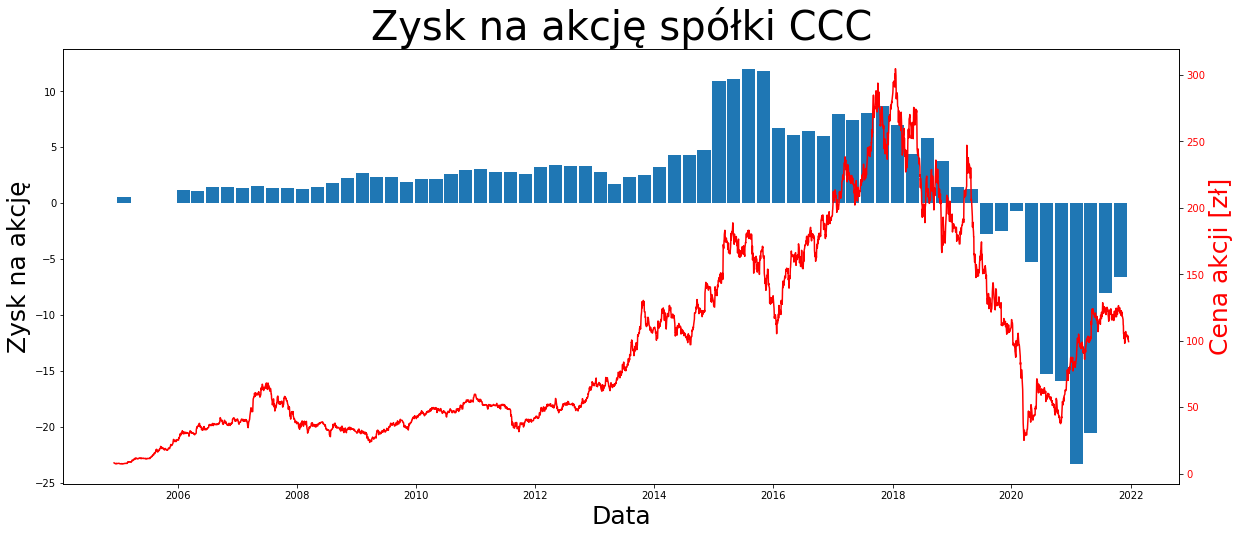

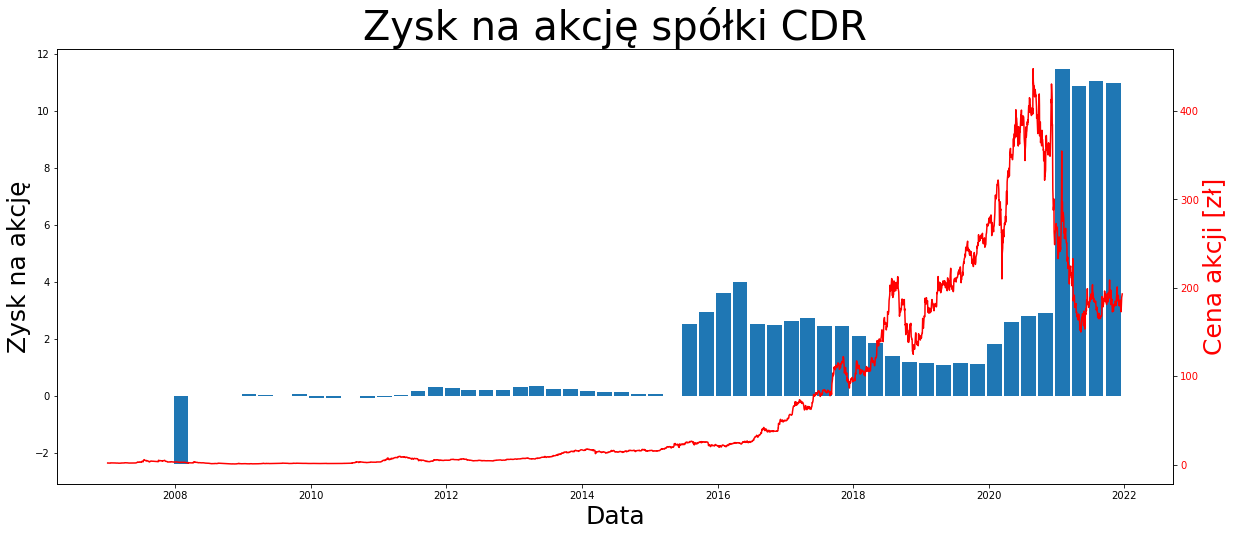

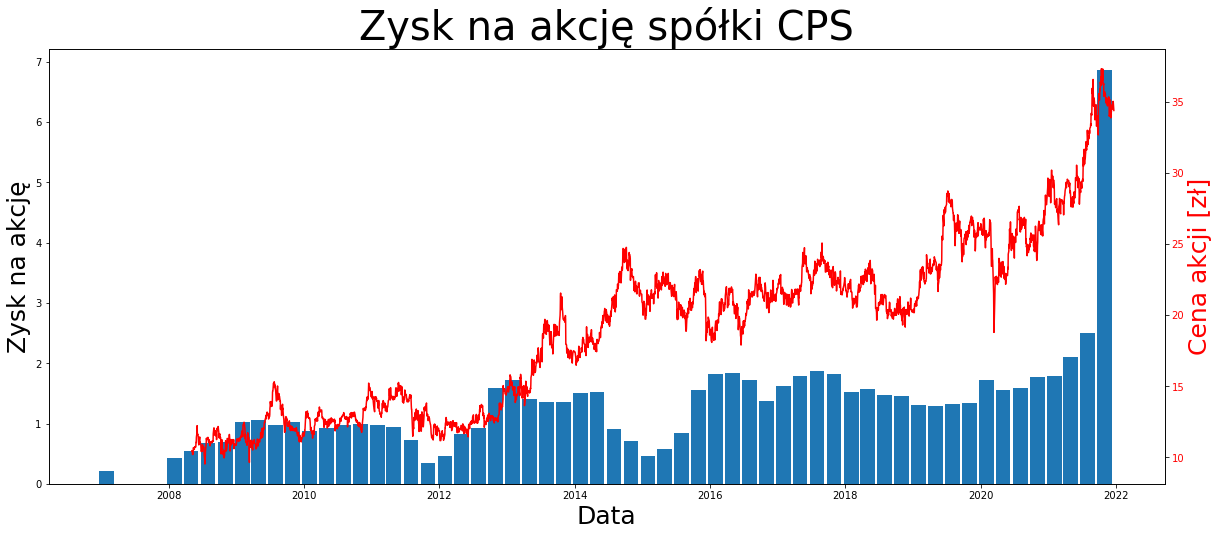

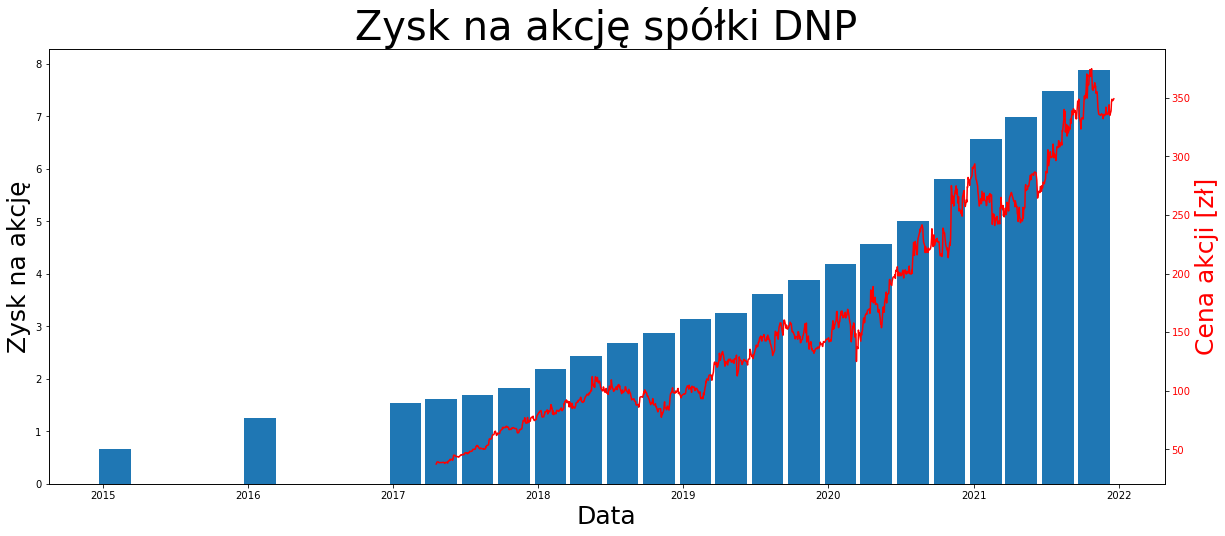

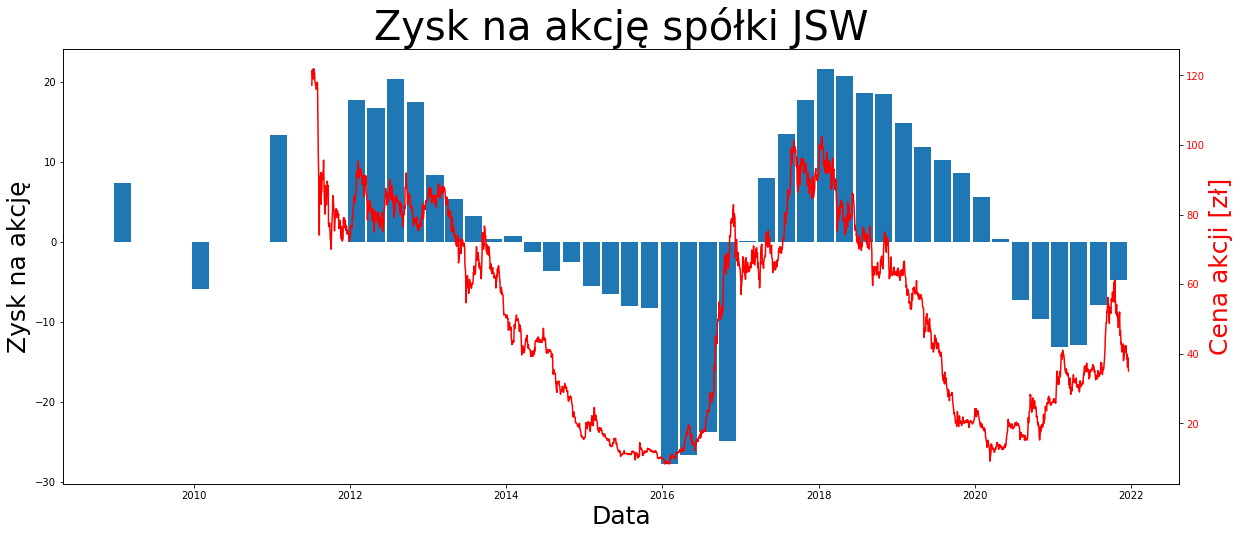

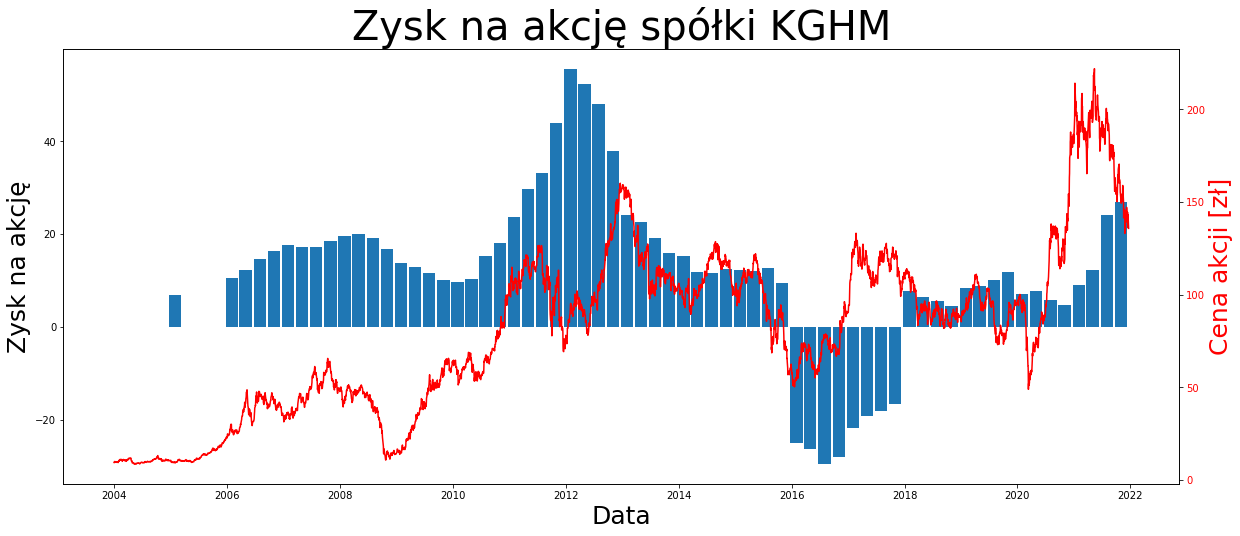

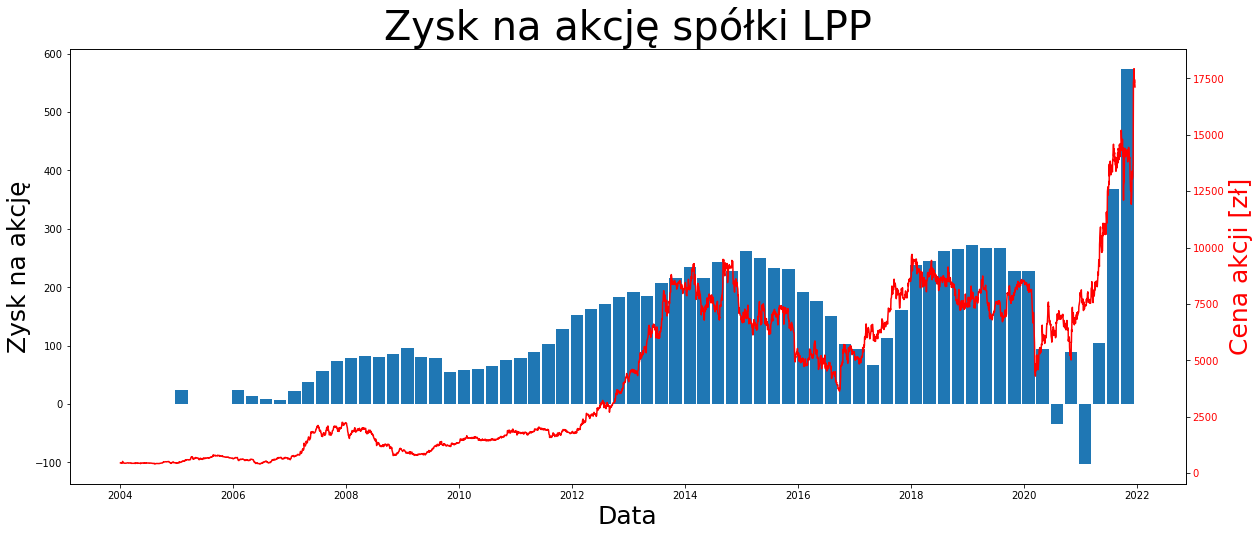

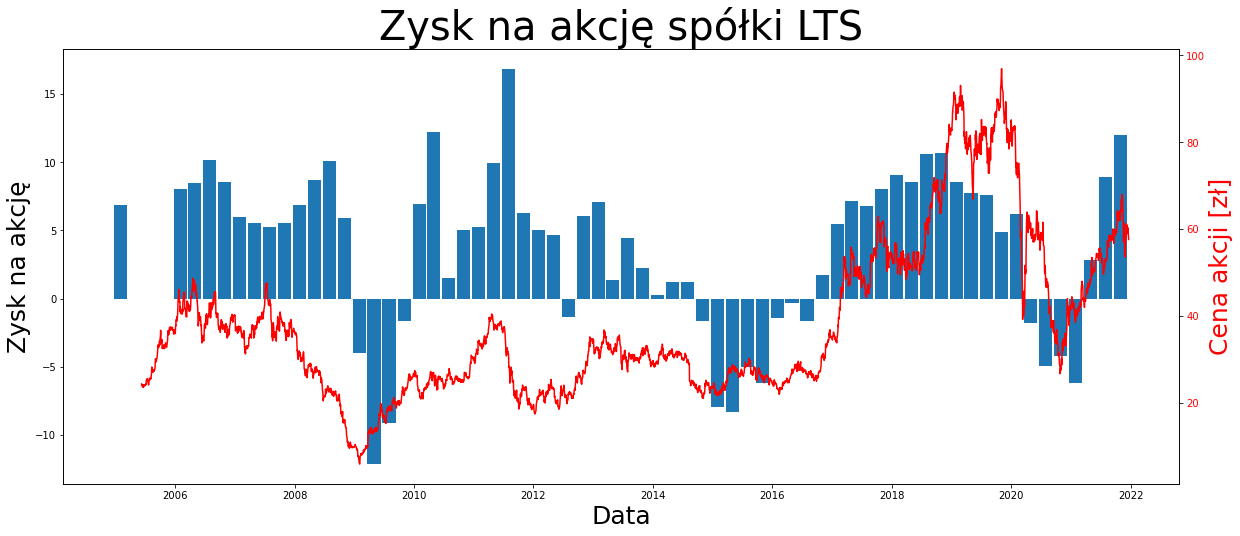

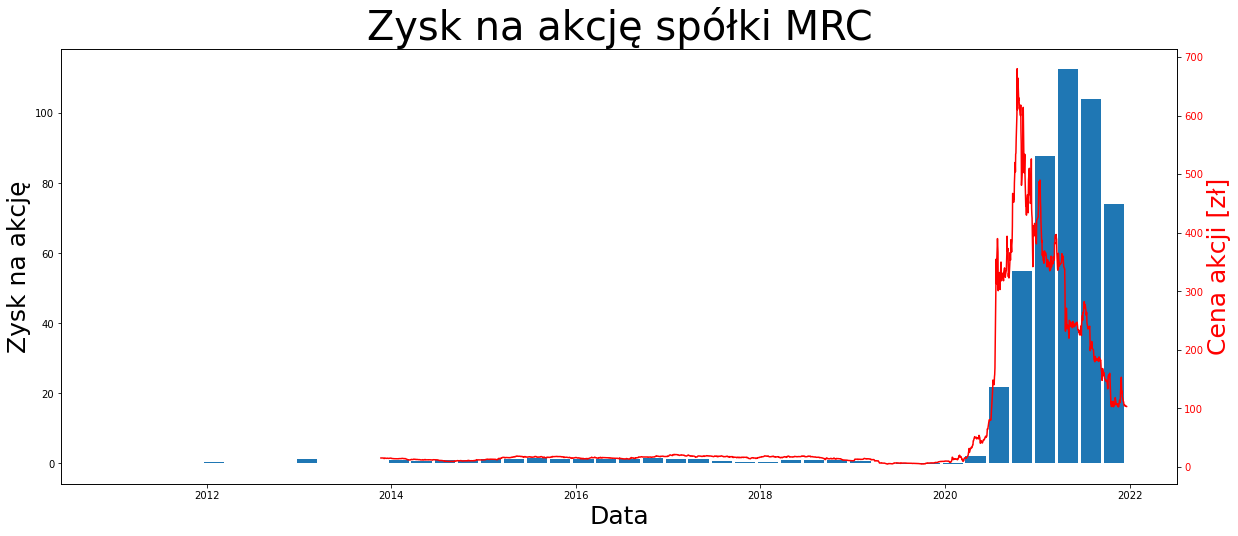

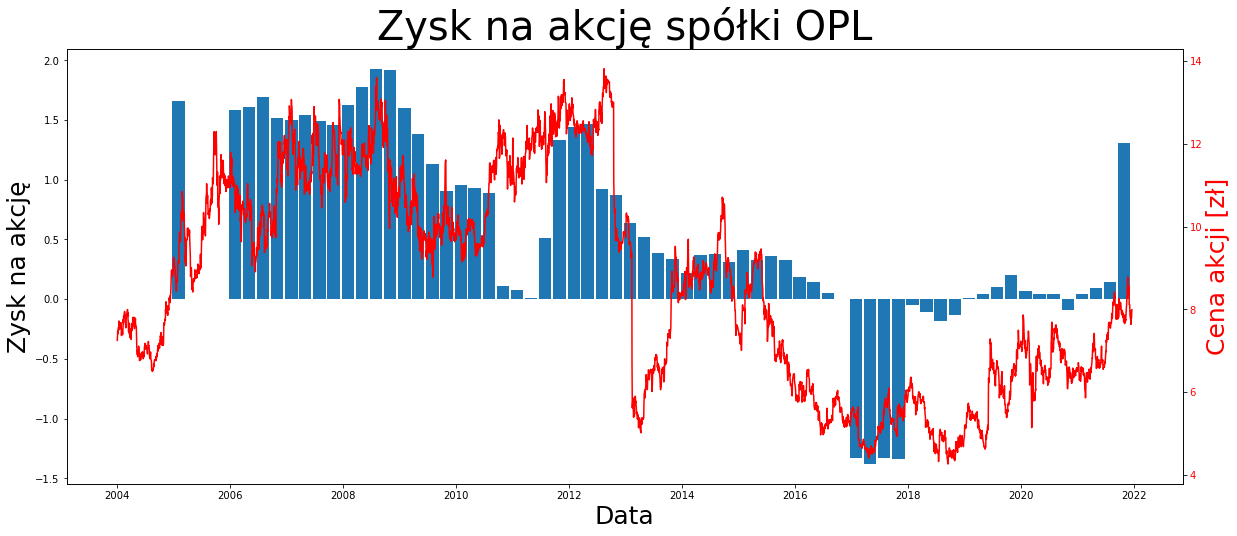

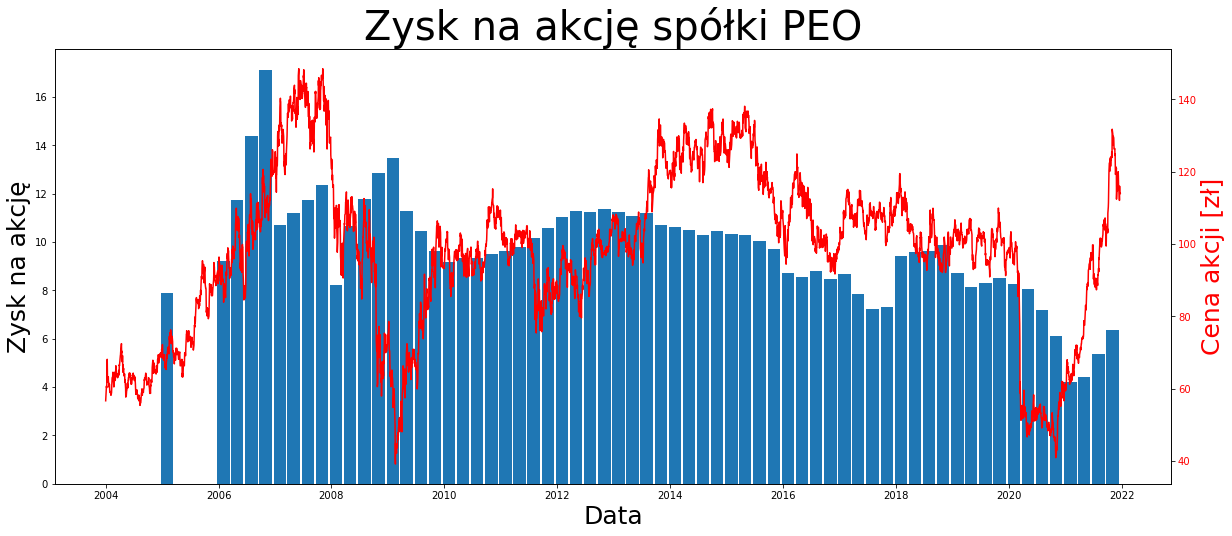

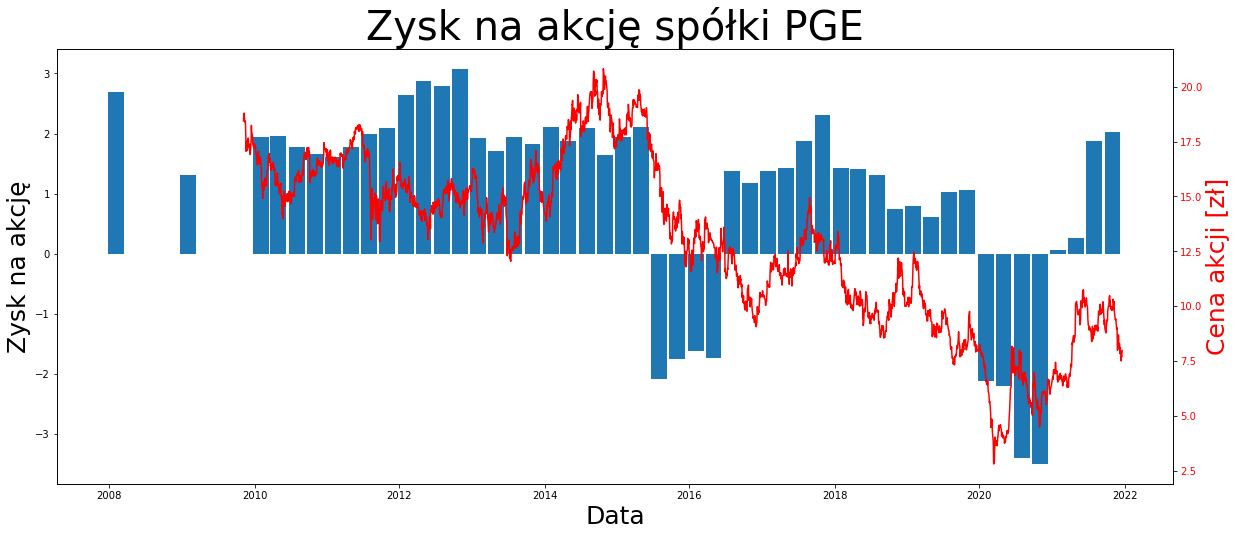

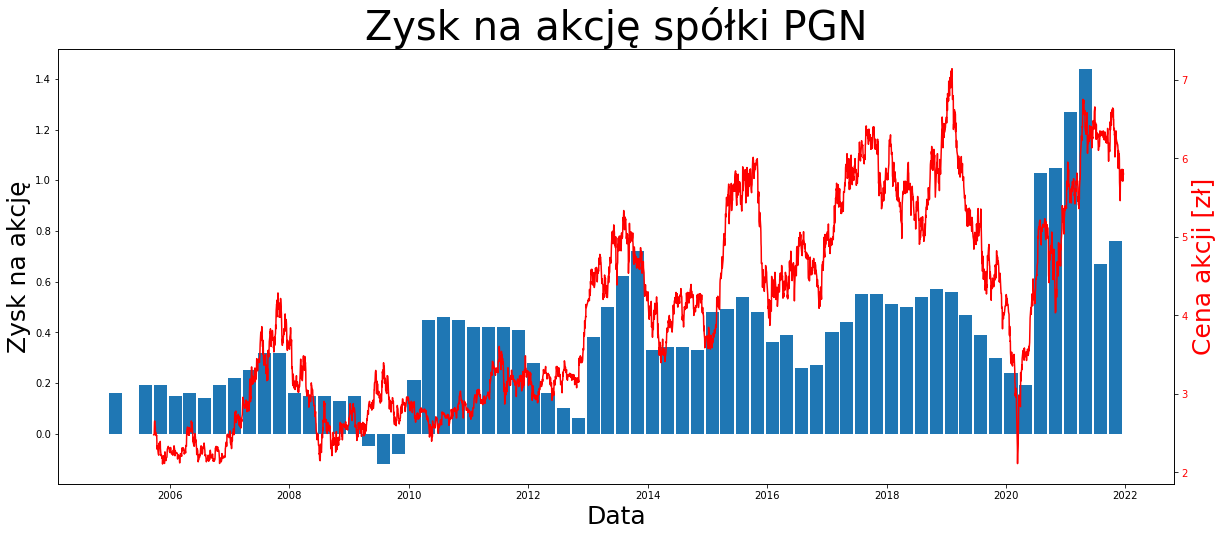

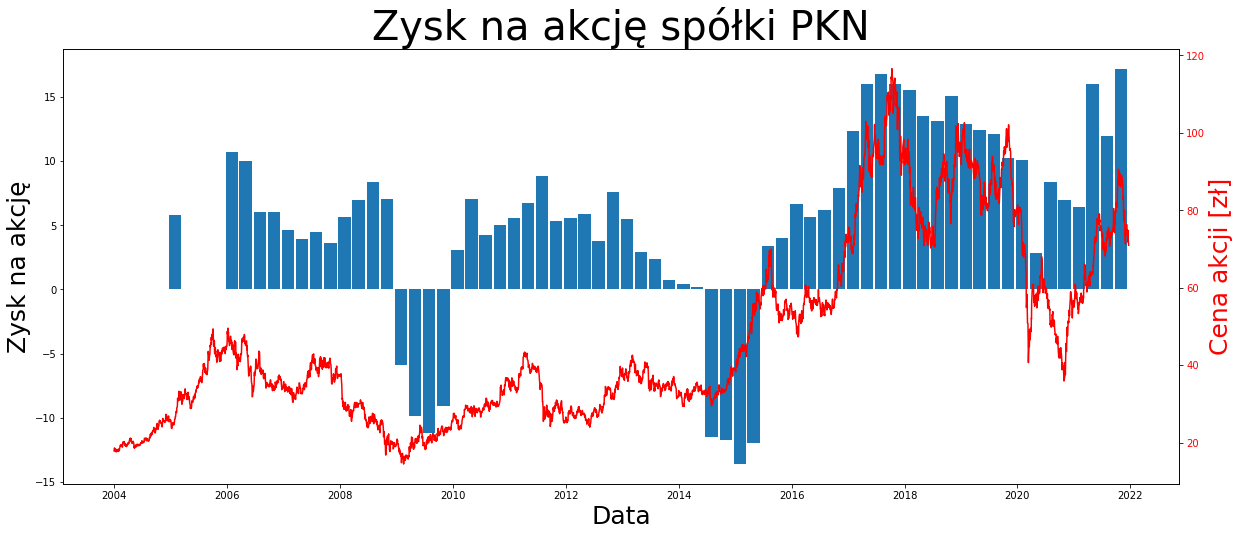

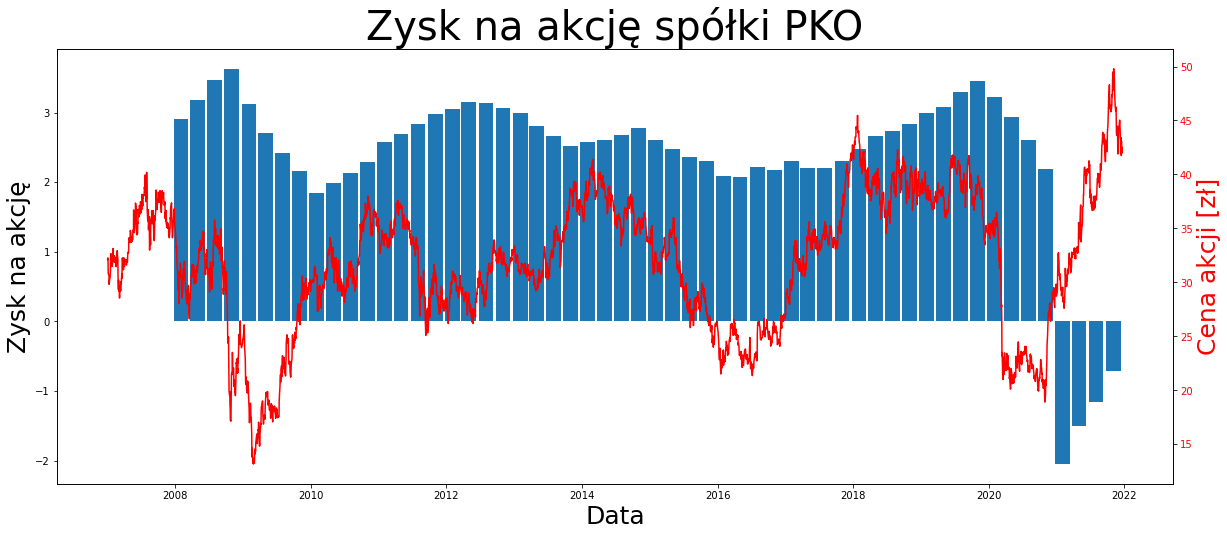

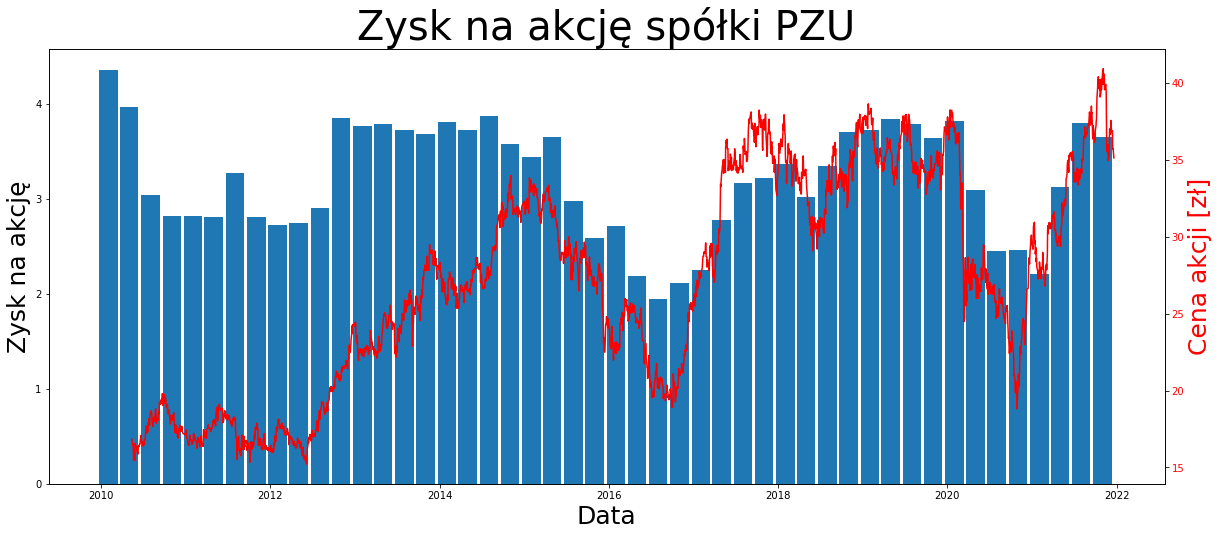

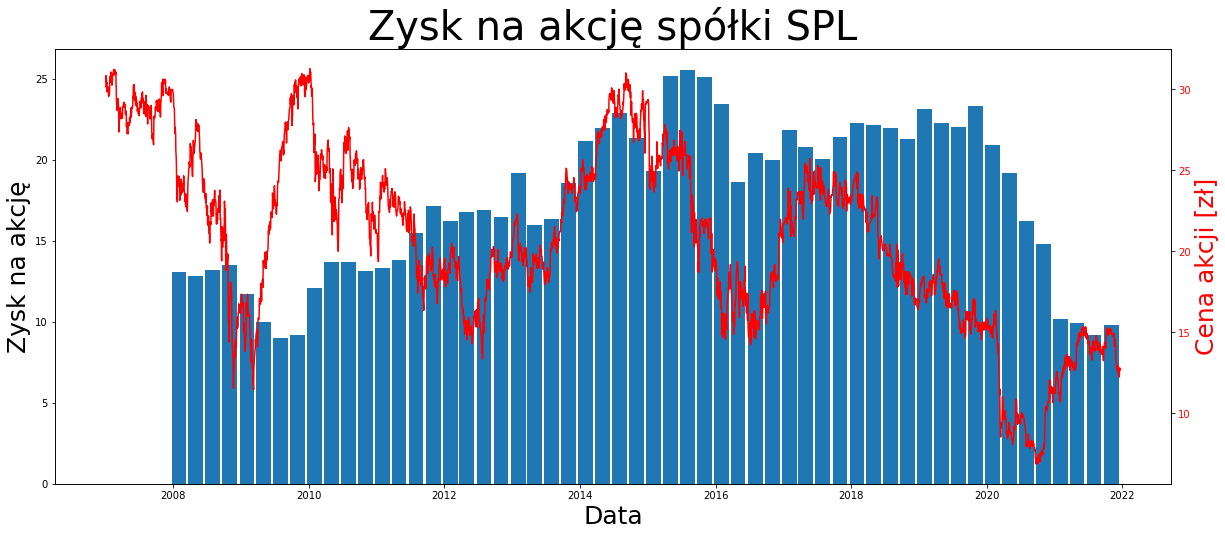

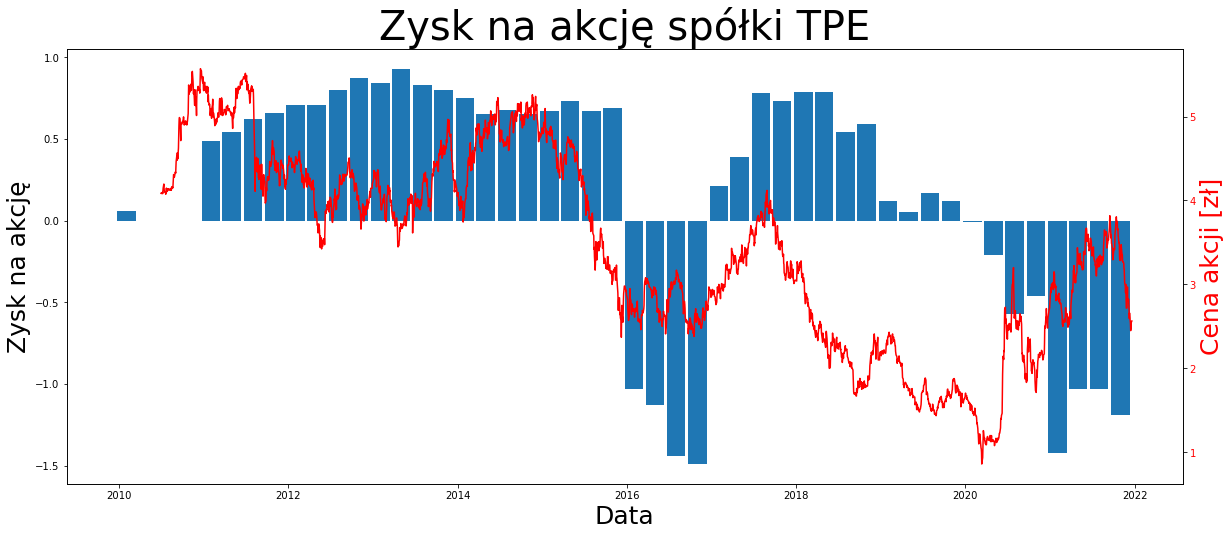

In [11]:
indicator = 'Zysk na akcję'
for stock in stock_data.Spółka.drop_duplicates().to_list():
    plot_fundamental_indicators(stock, indicator)

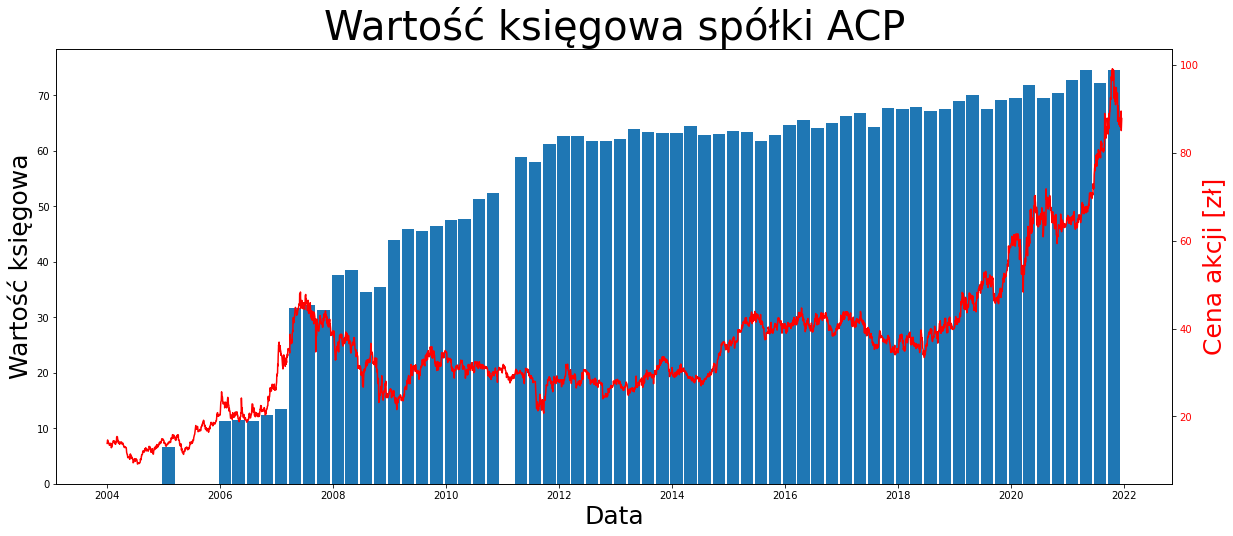

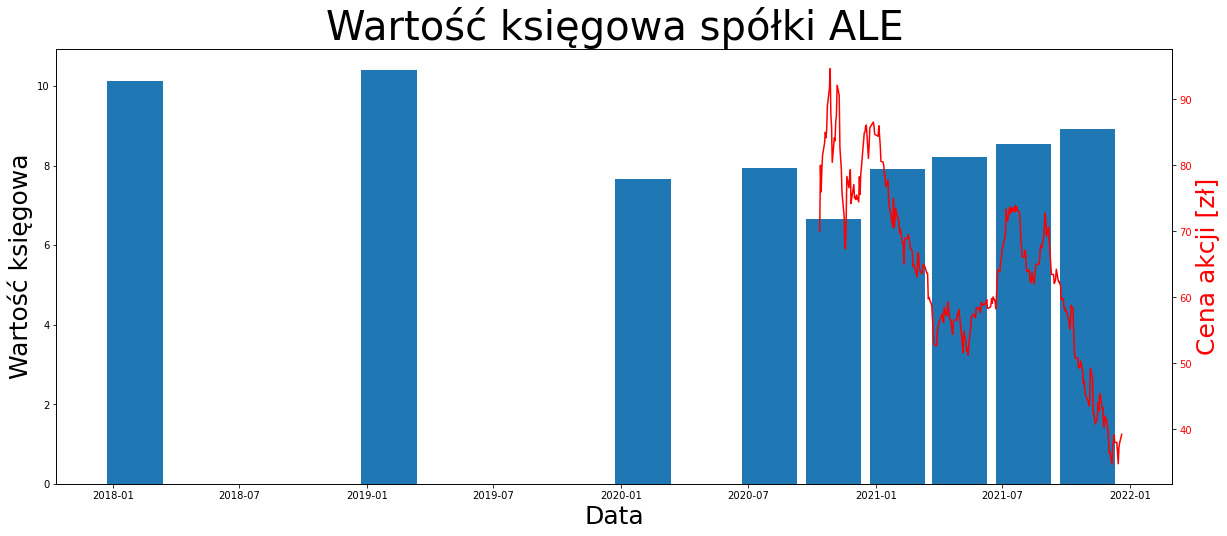

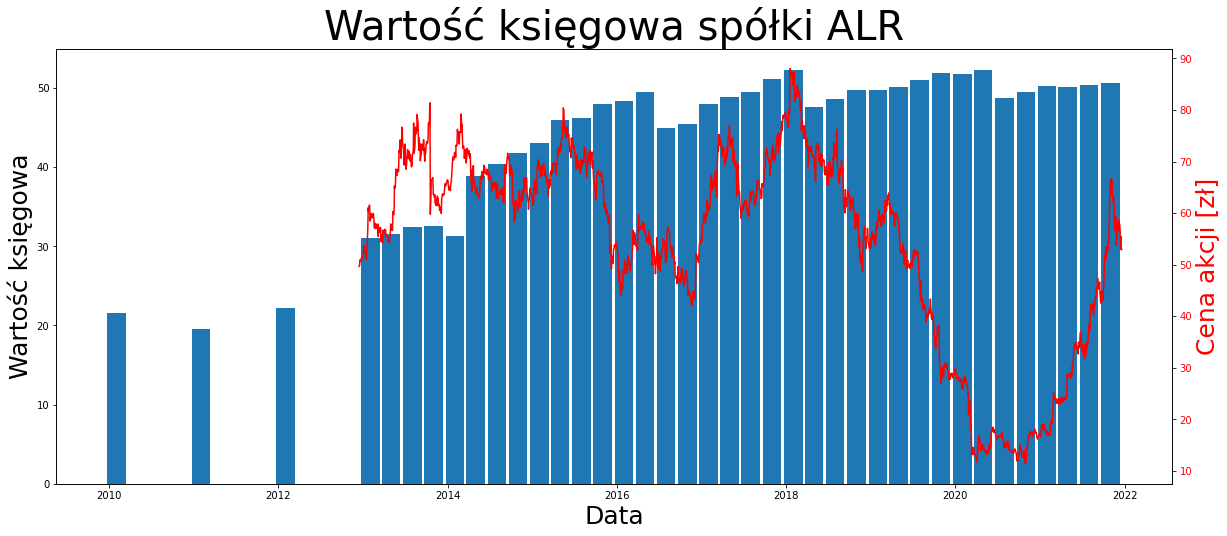

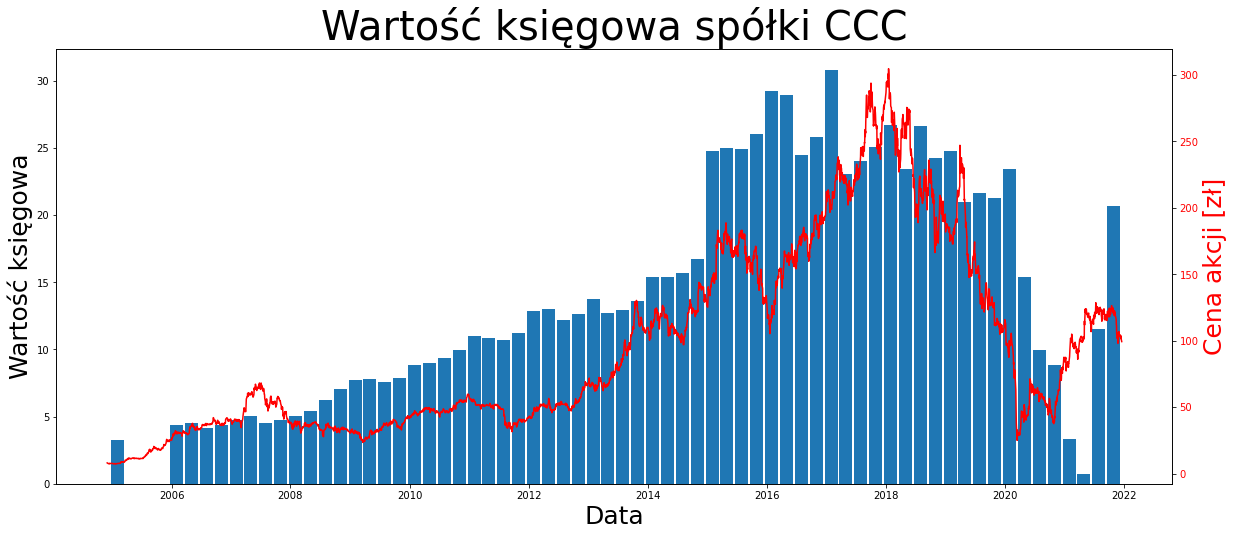

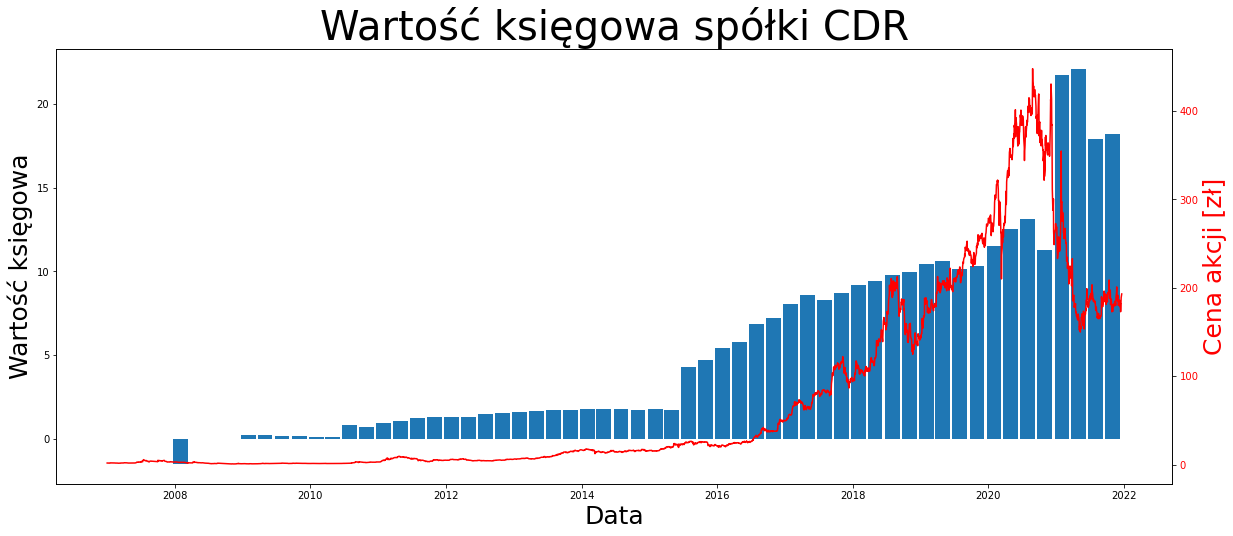

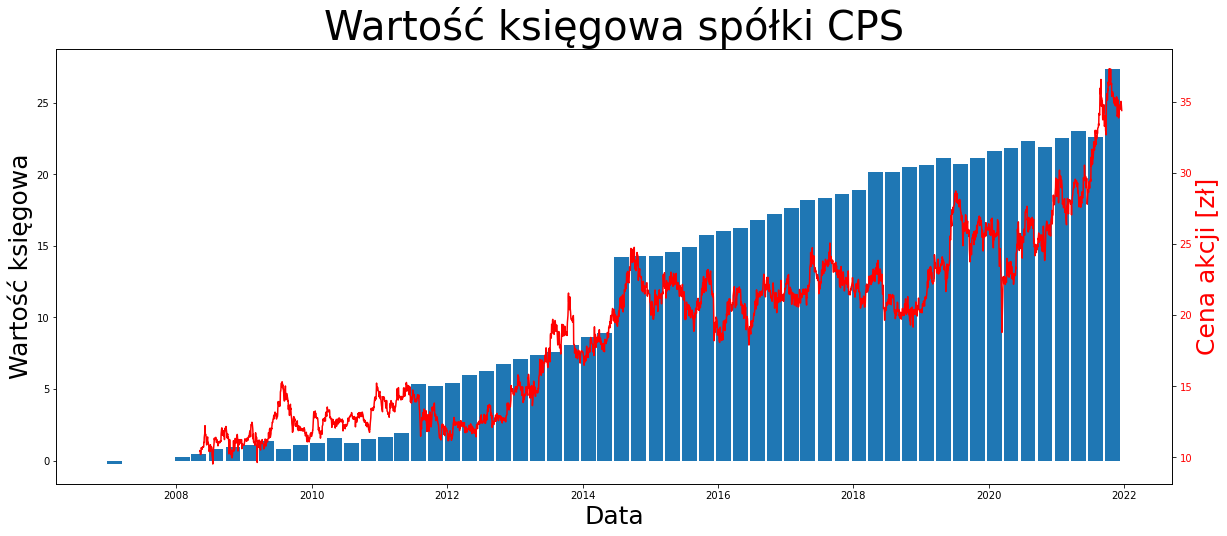

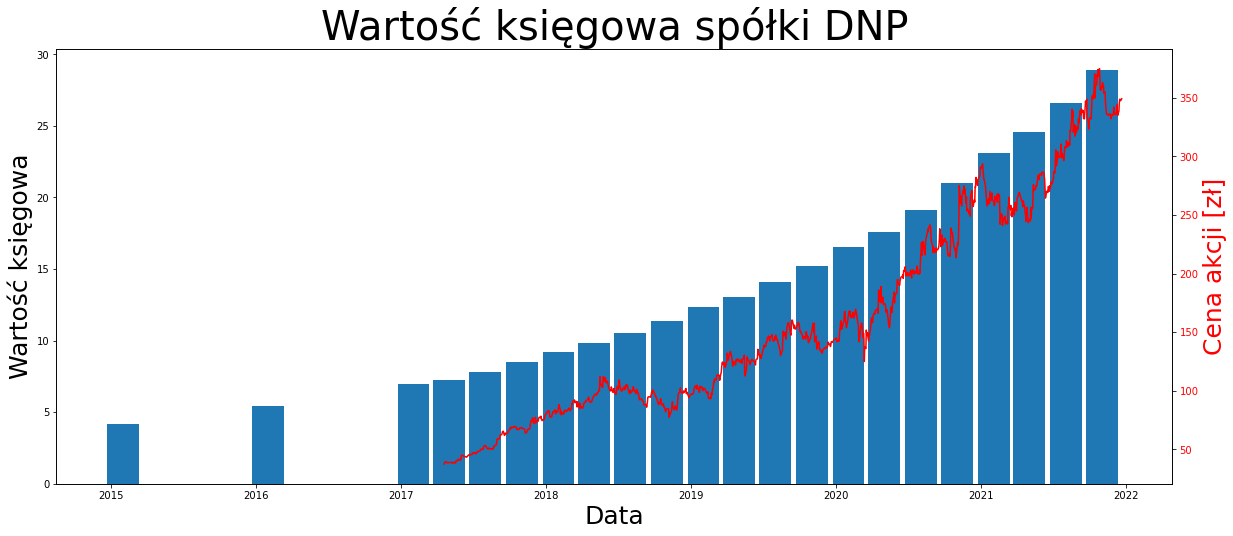

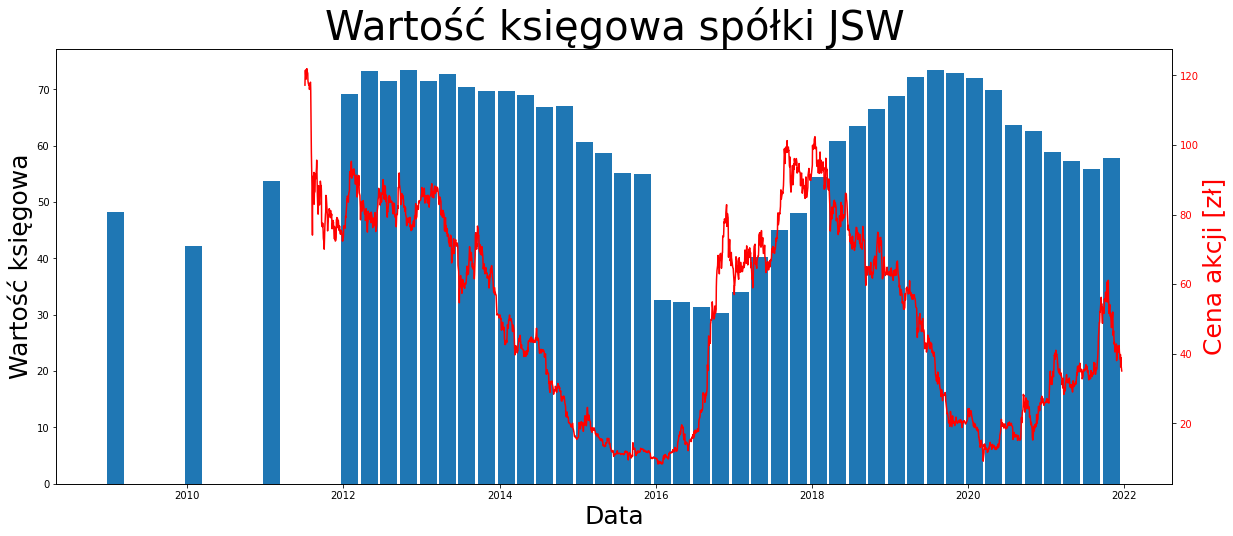

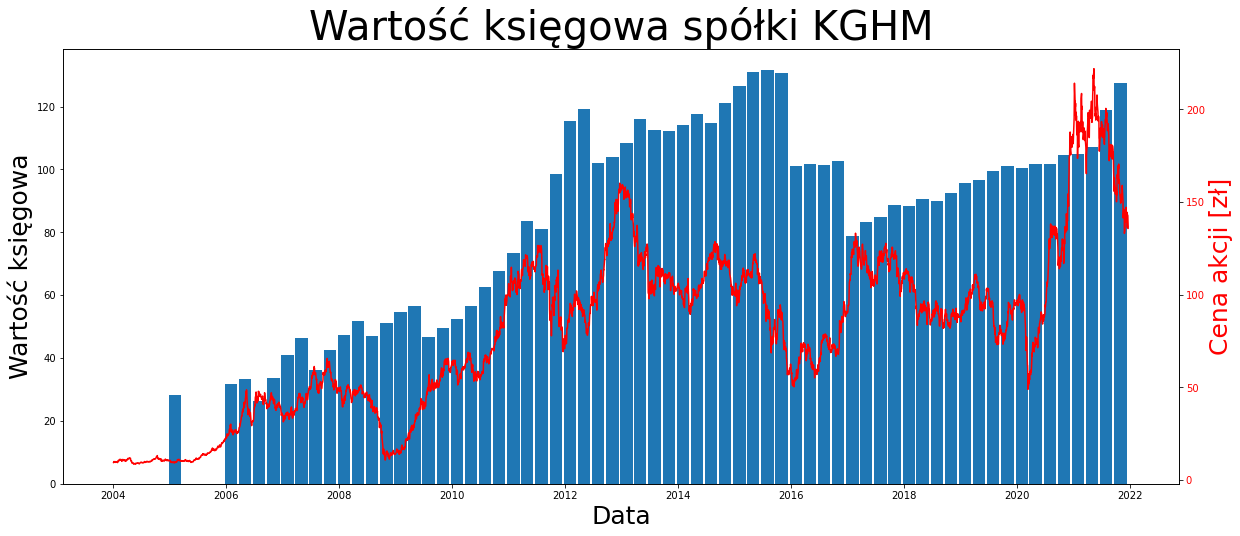

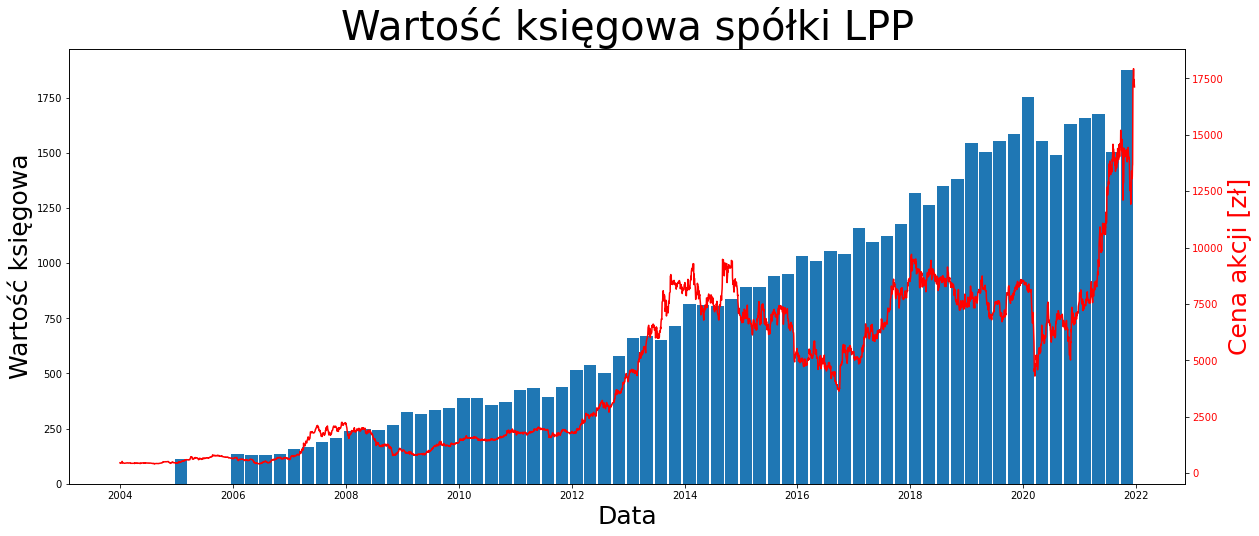

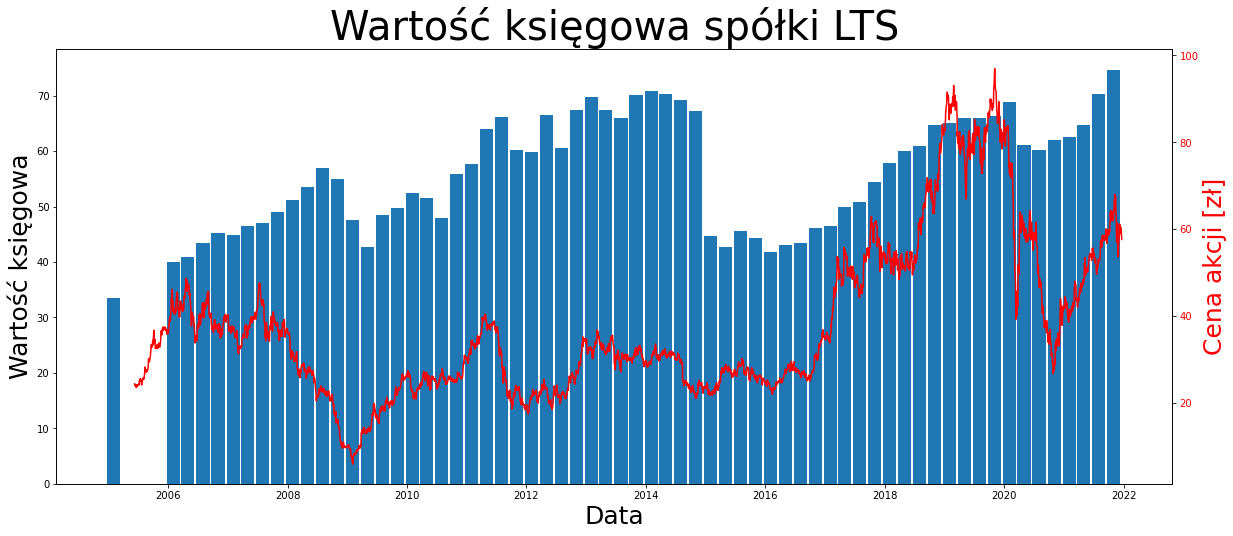

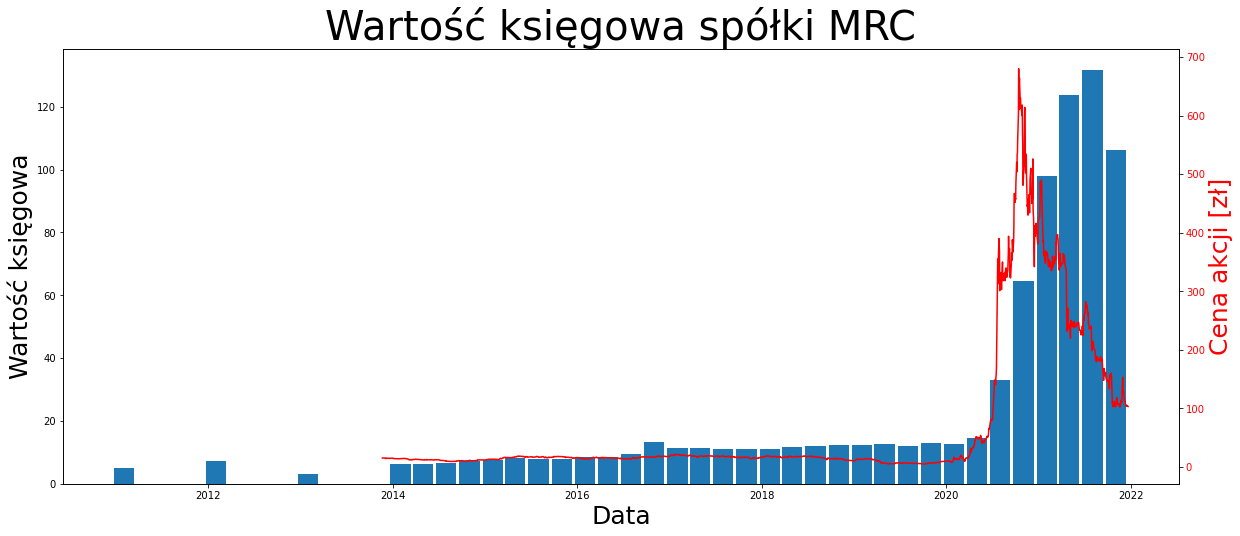

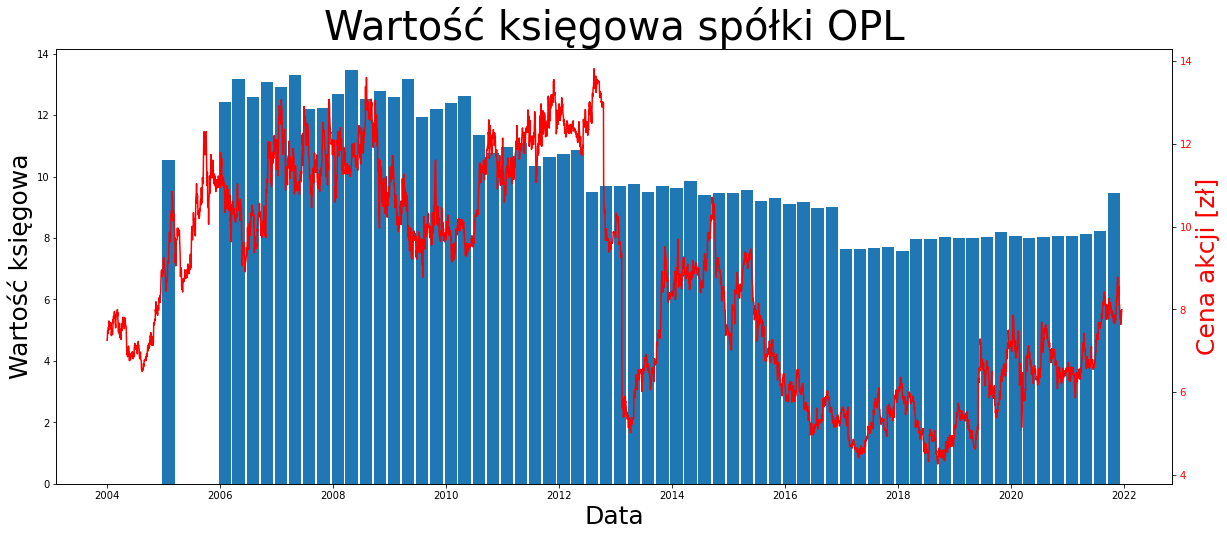

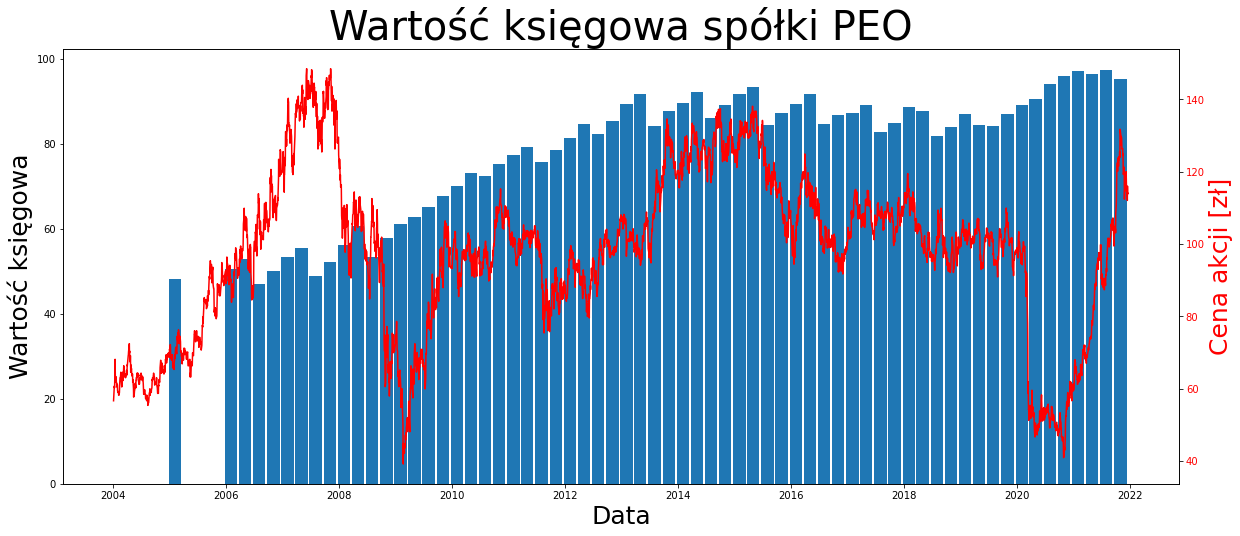

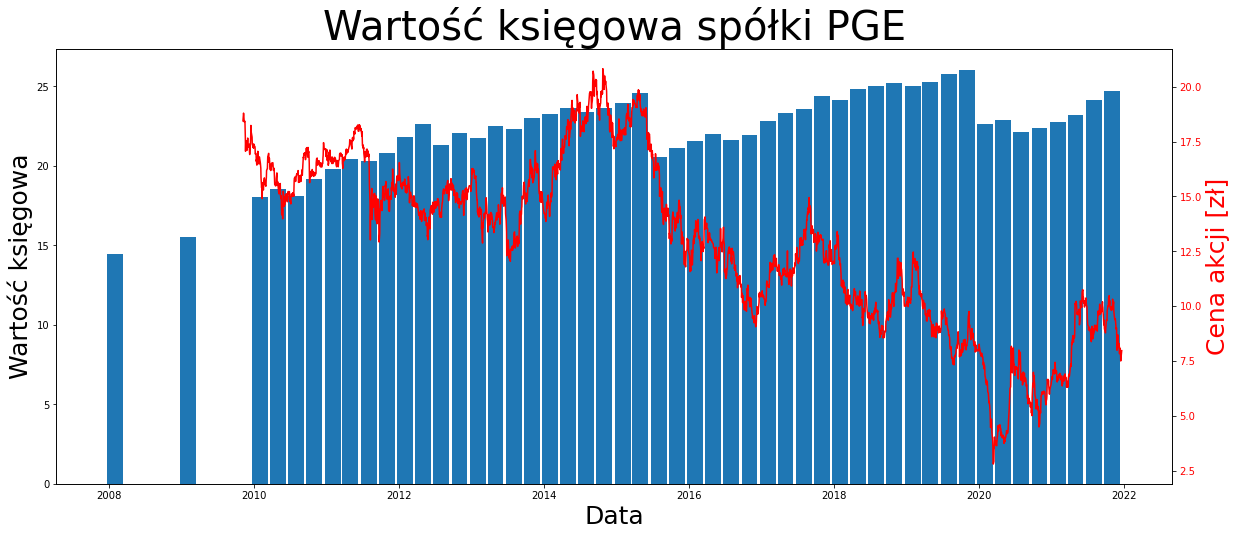

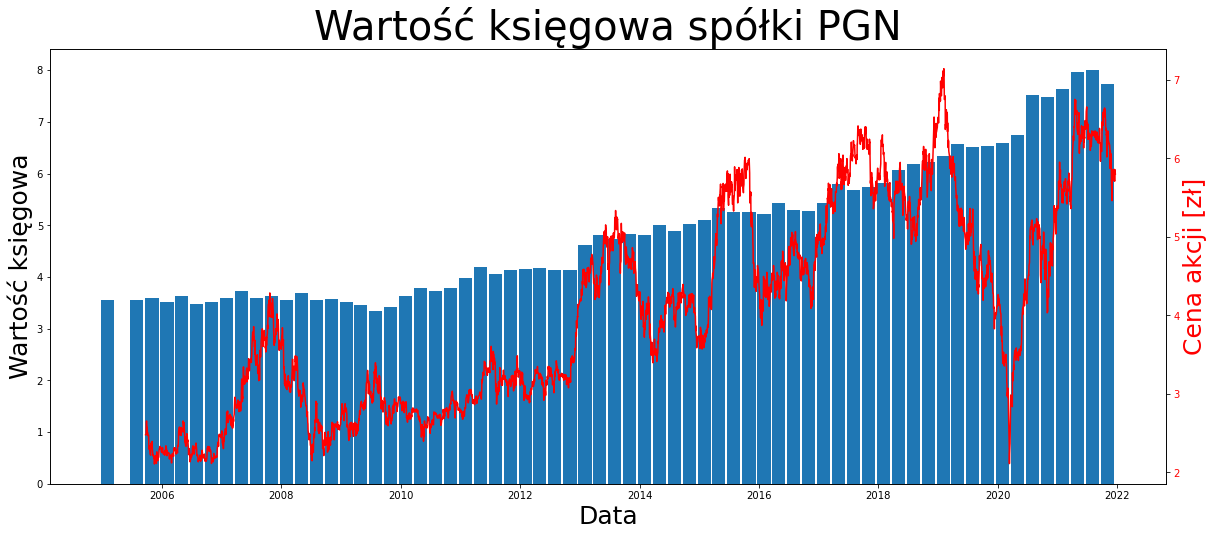

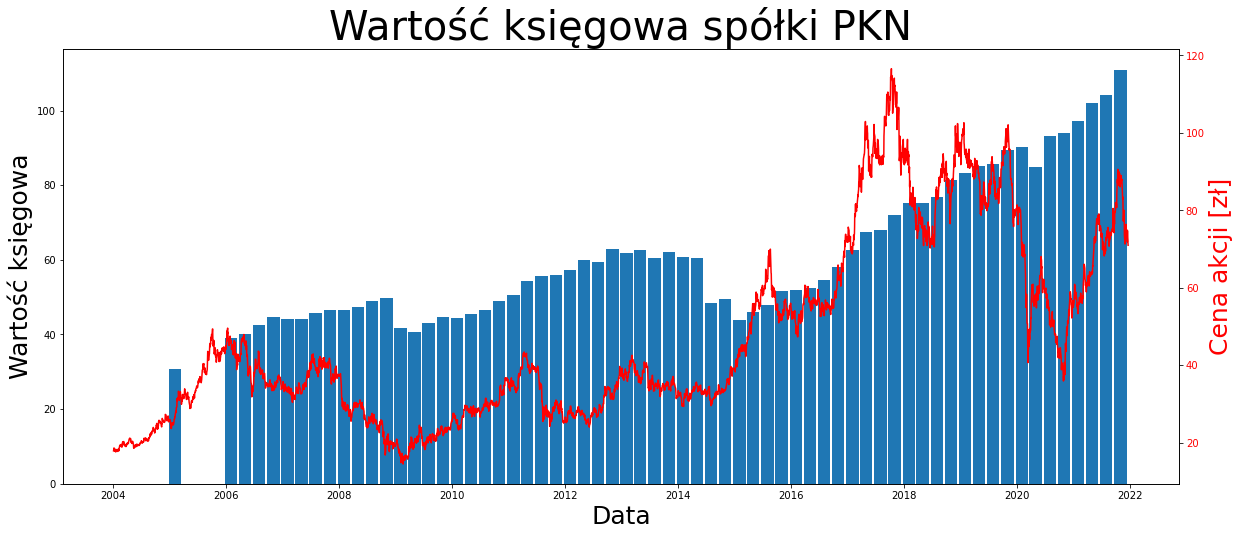

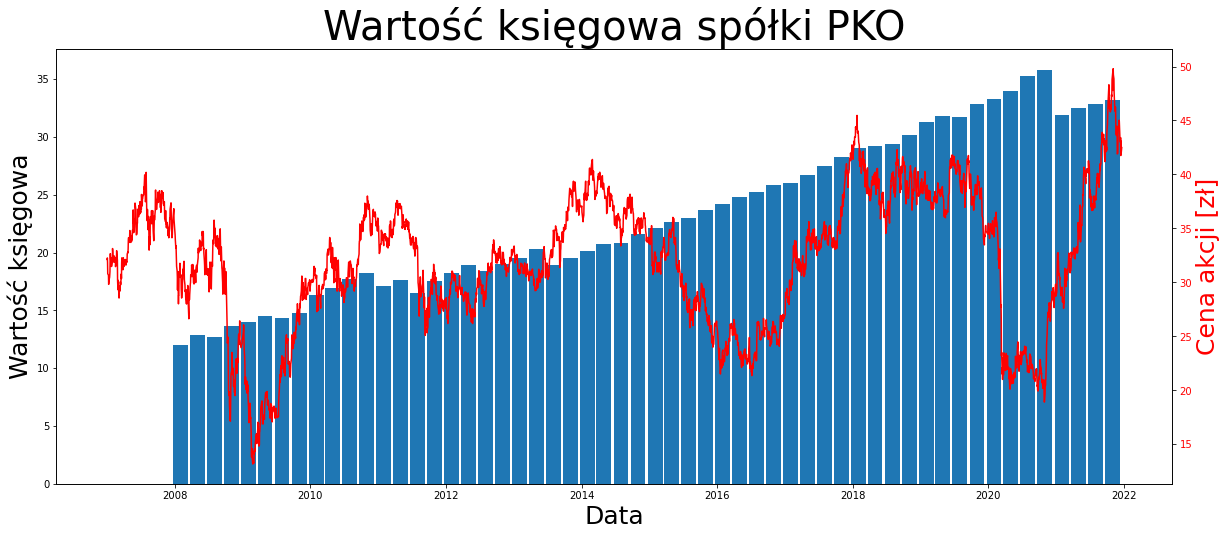

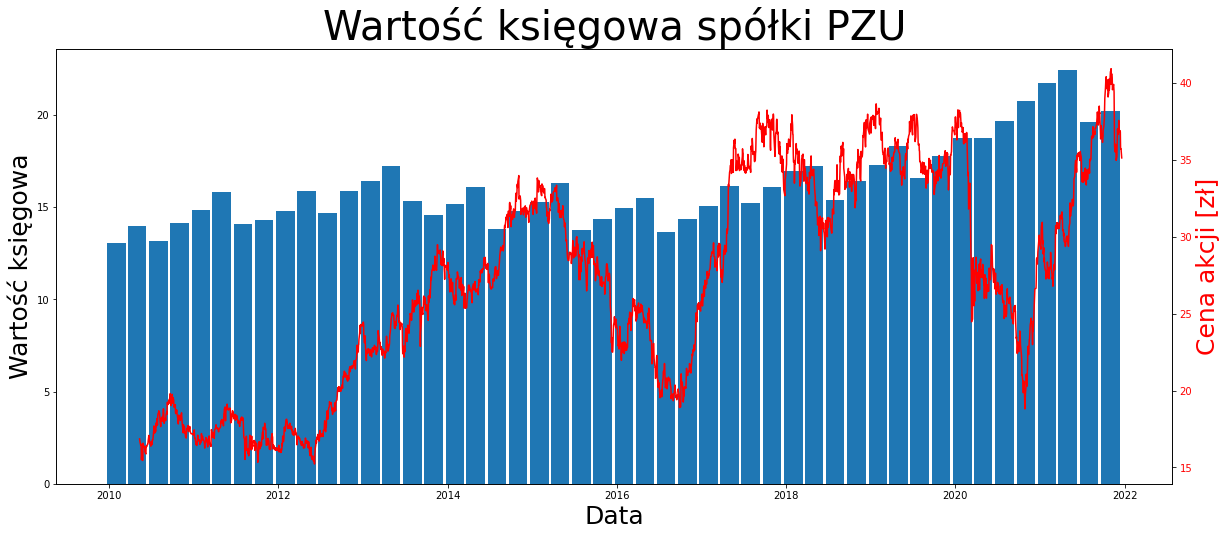

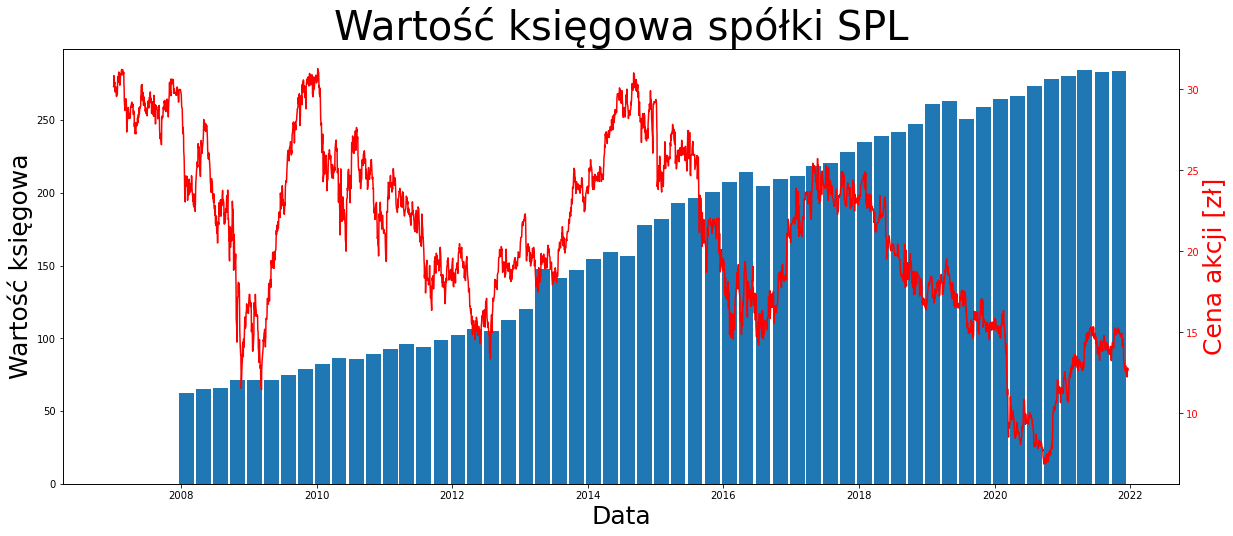

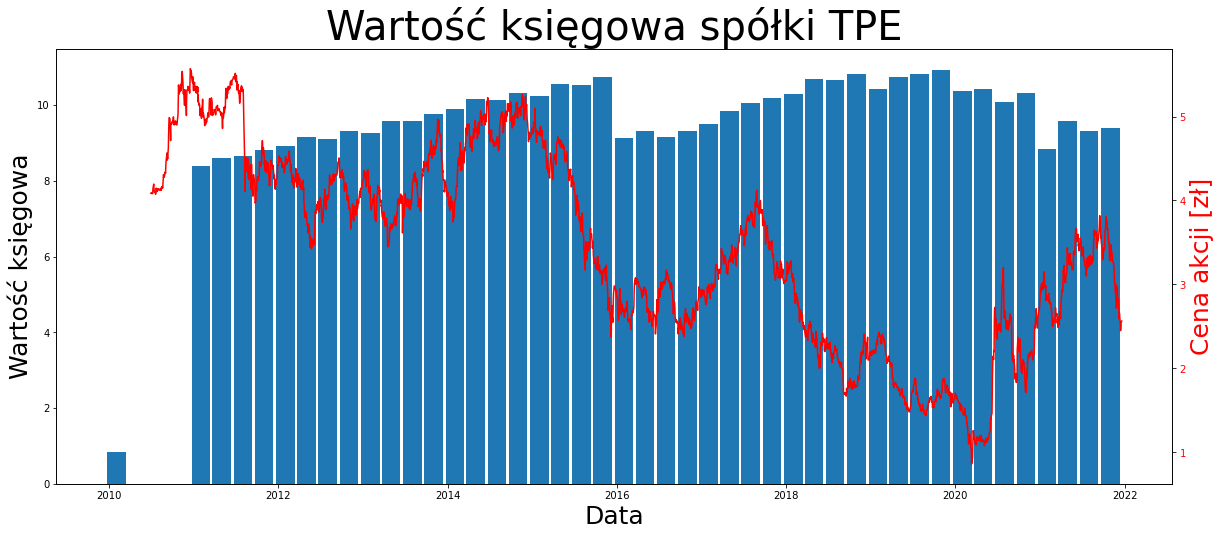

In [12]:
indicator = 'Wartość księgowa'
for stock in stock_data.Spółka.drop_duplicates().to_list():
    plot_fundamental_indicators(stock, indicator)

No data for DNP Cena/Wartość księgowa Grahama
No data for DNP ROE
No data for DNP ROA
No data for DNP Marża zysku operacyjnego
No data for DNP Marża zysku netto
No data for DNP Marża zysku ze sprzedaży
No data for DNP Marża zysku brutto
No data for DNP Marża zysku brutto ze sprzedaży
No data for DNP Rentowność operacyjna aktywów
No data for DNP Udział zysku netto w przepływach operacyjnych
No data for DNP Wskaźnik źródeł finansowania inwestycji


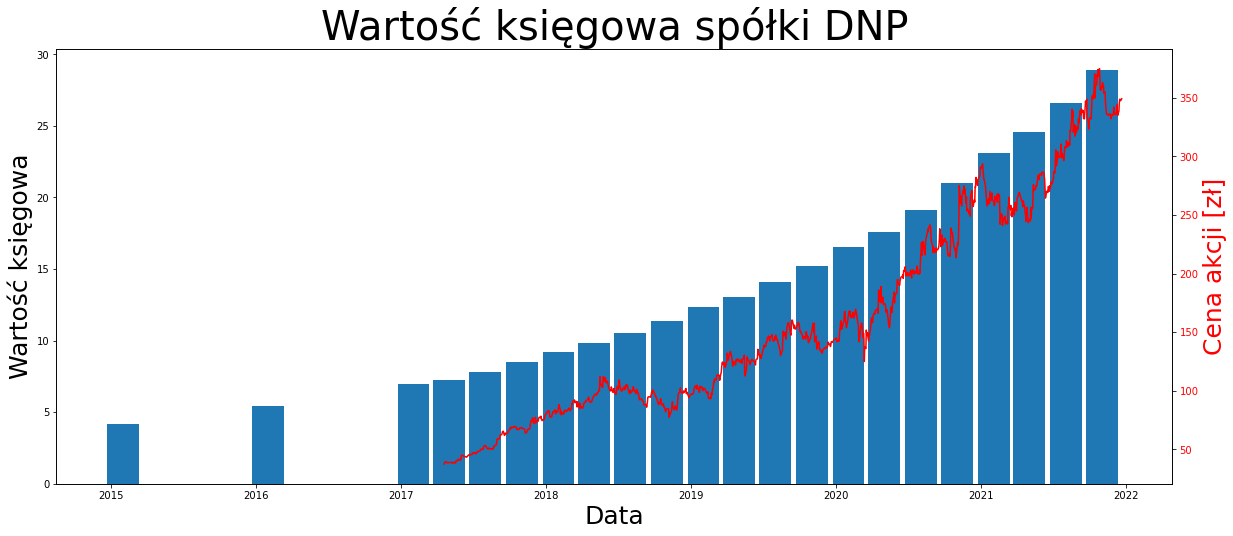

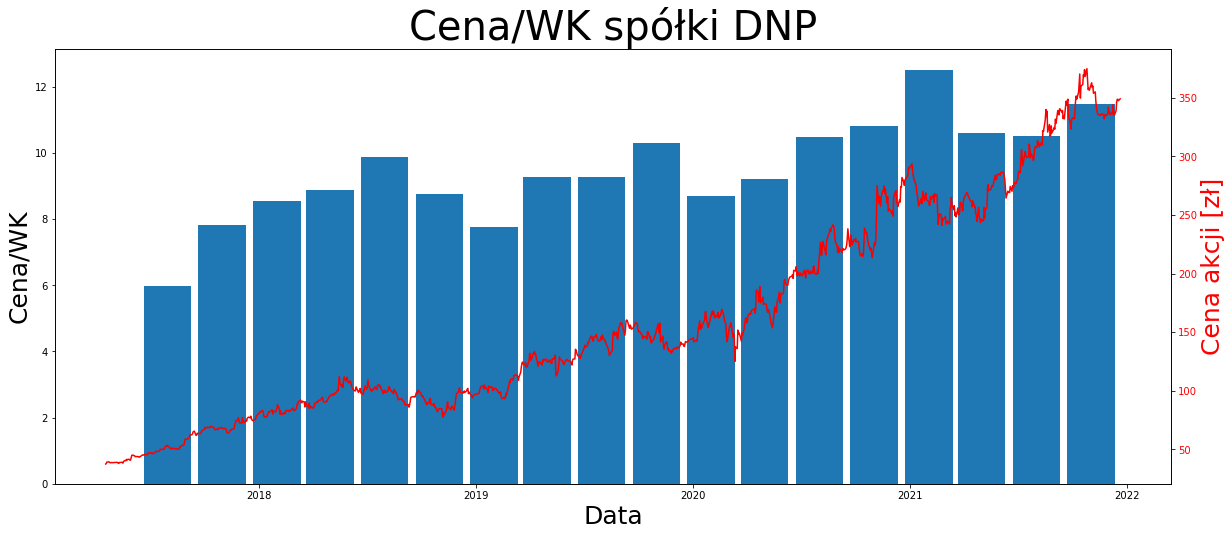

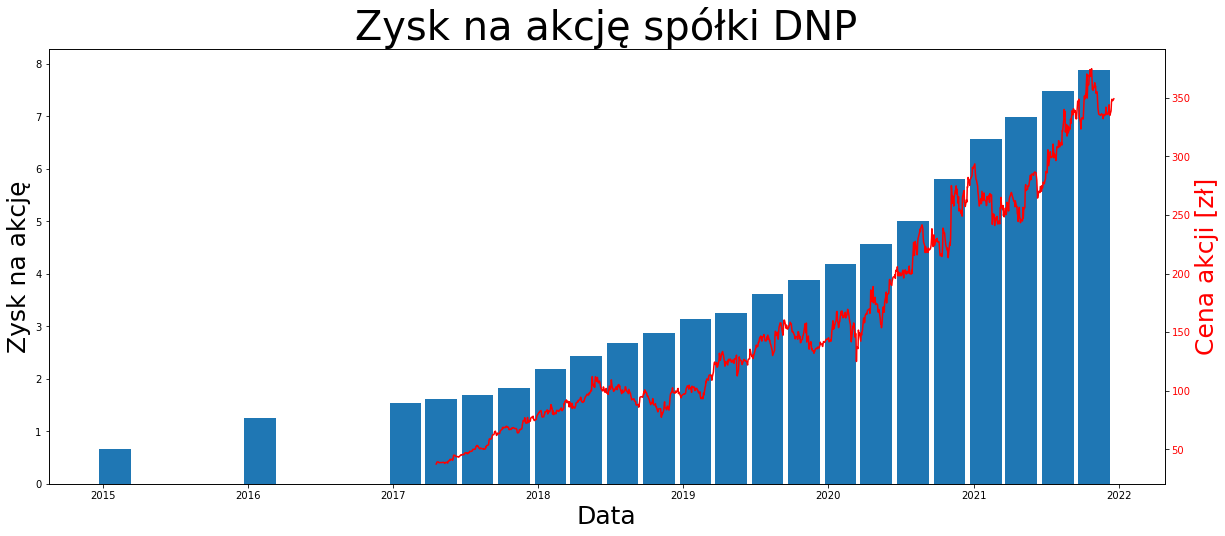

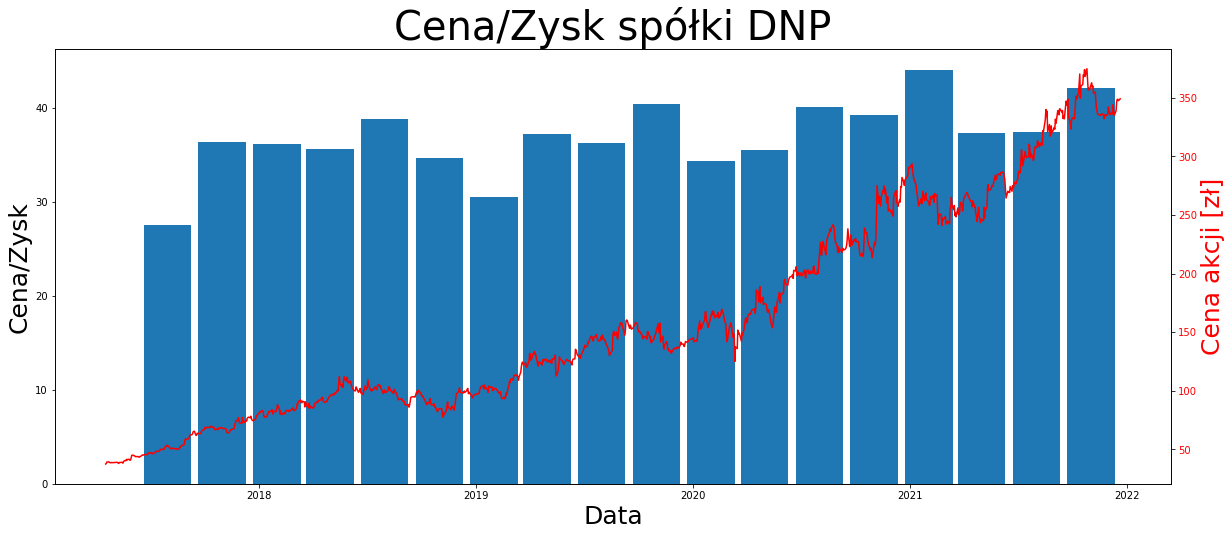

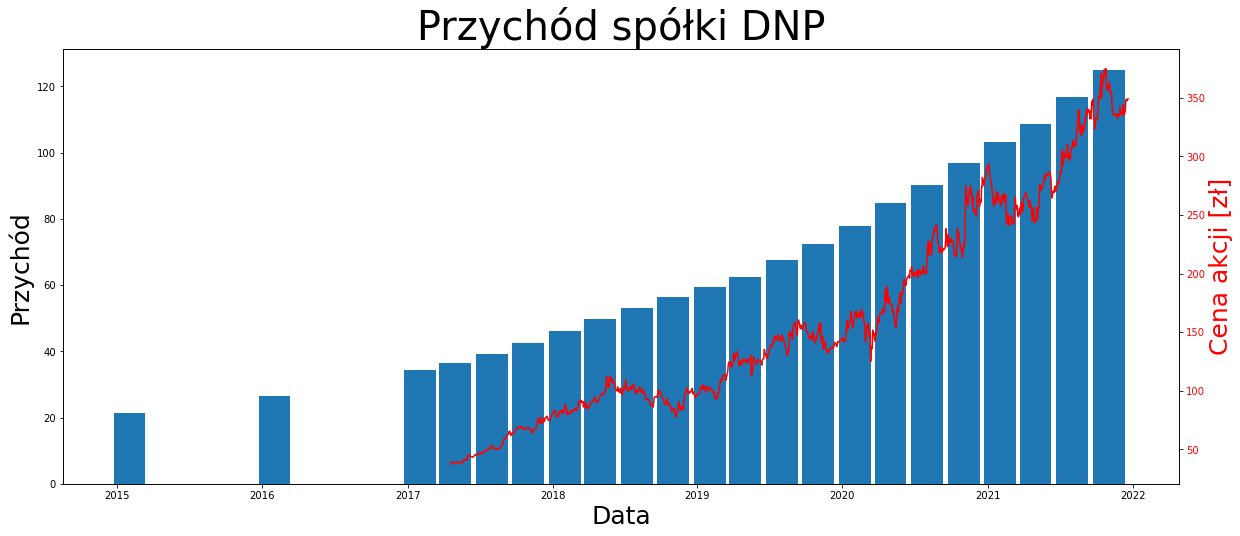

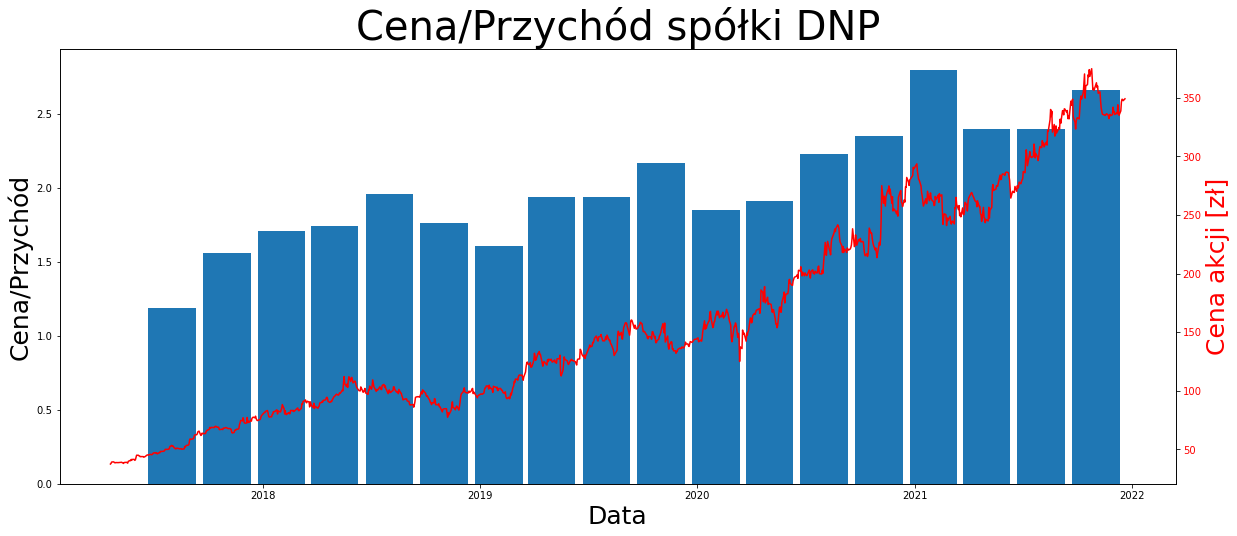

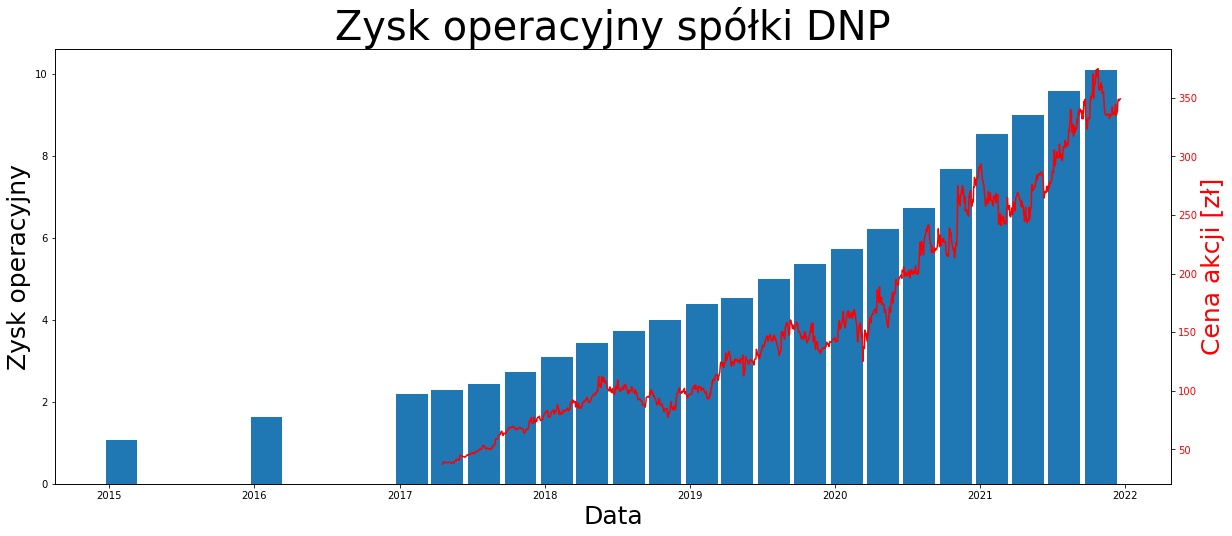

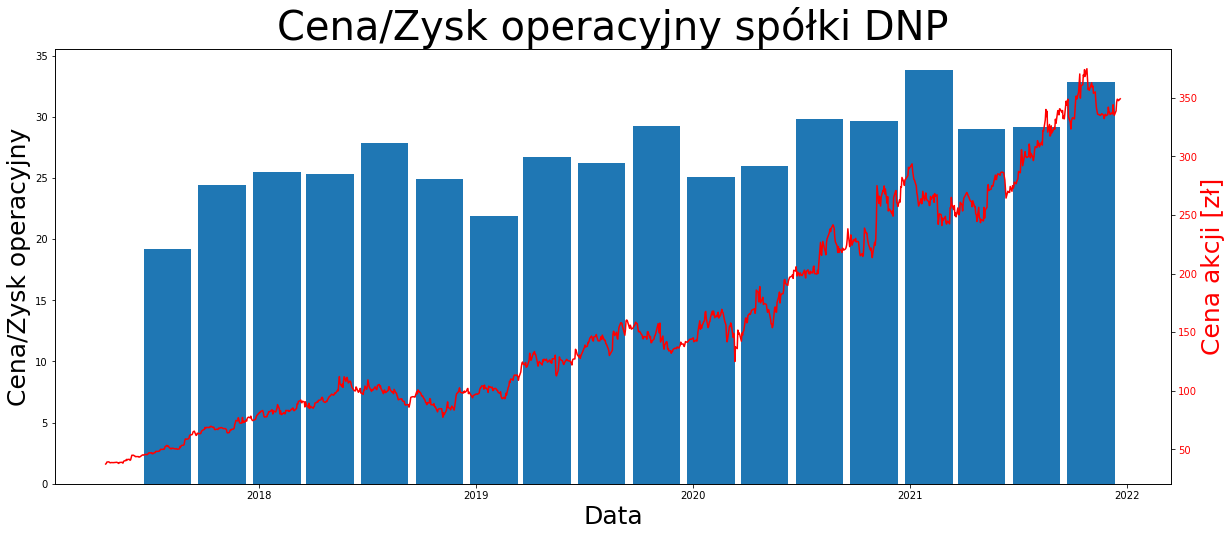

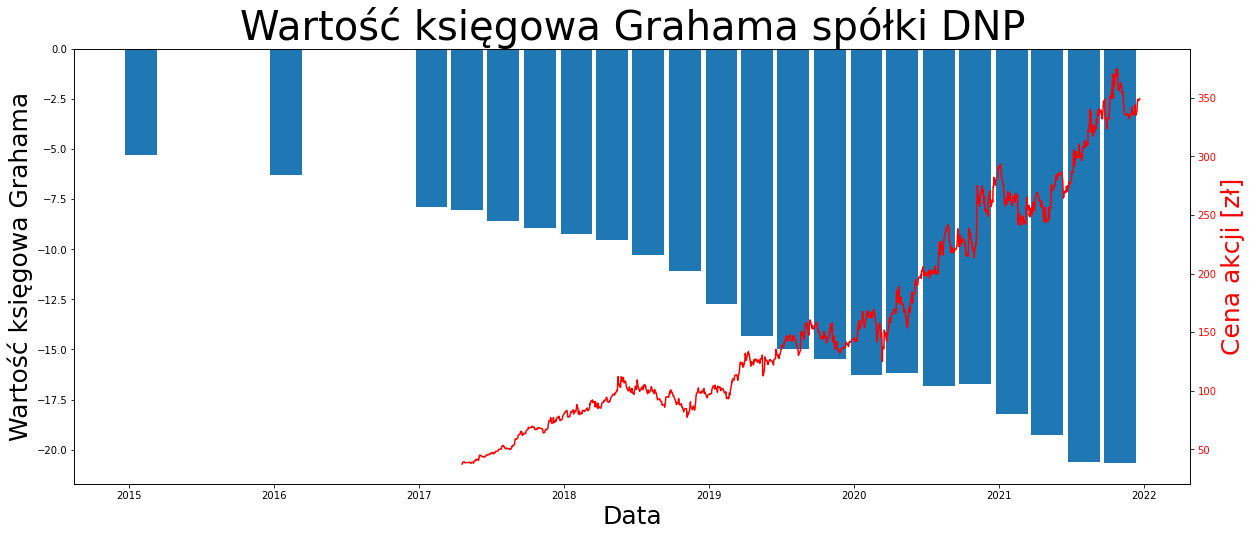

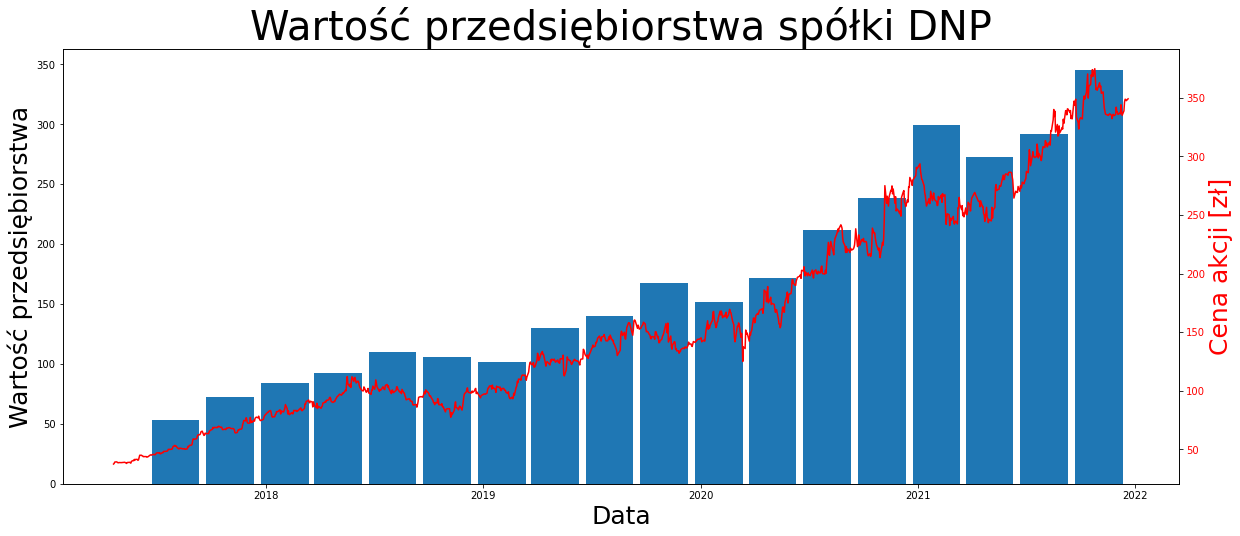

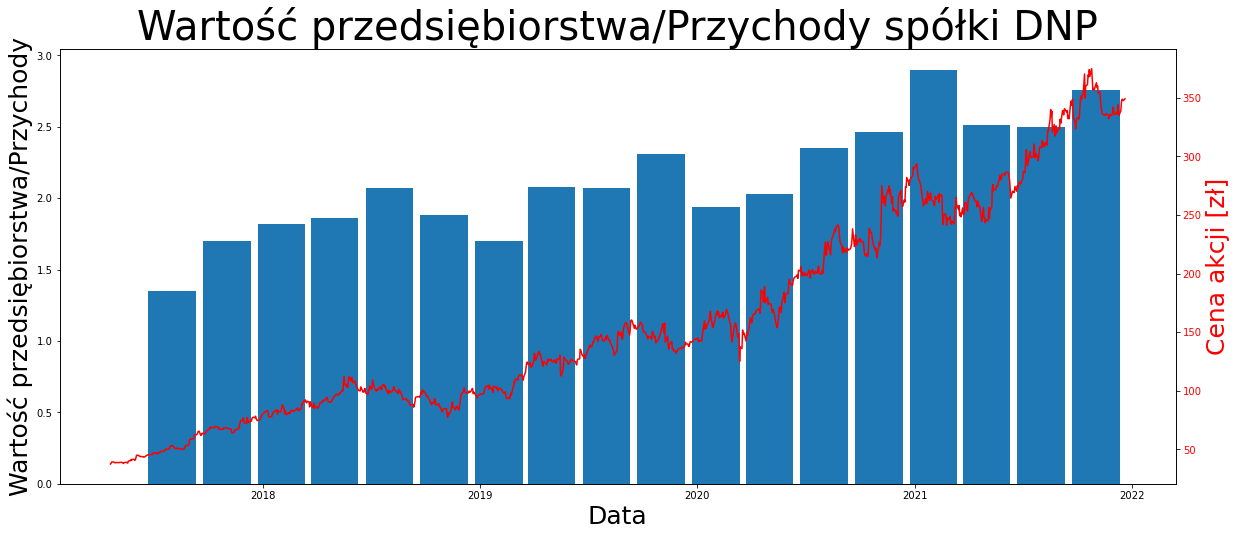

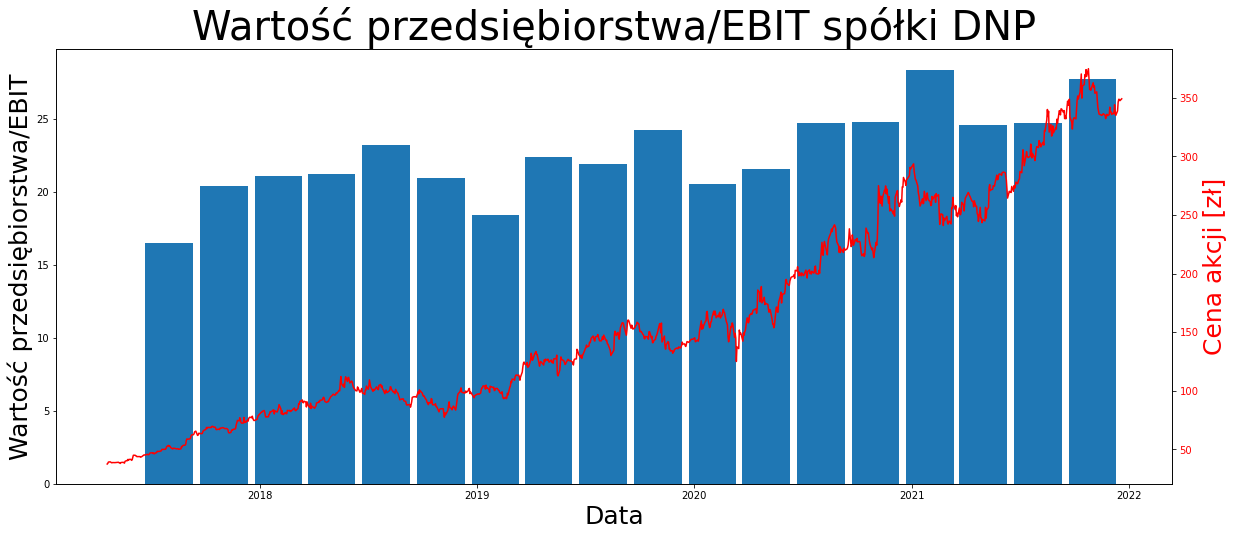

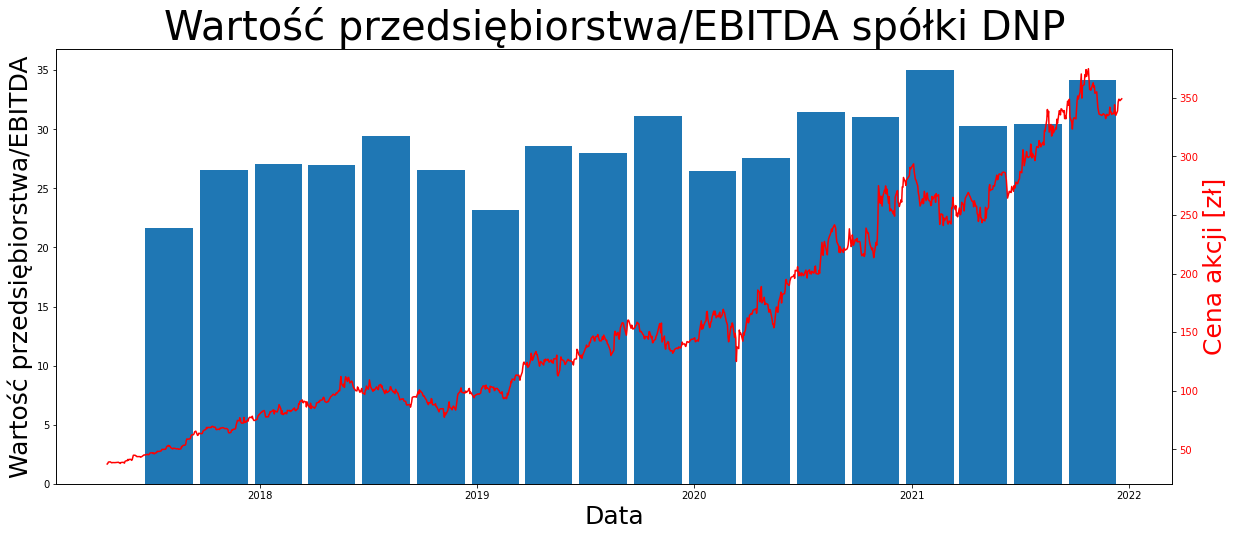

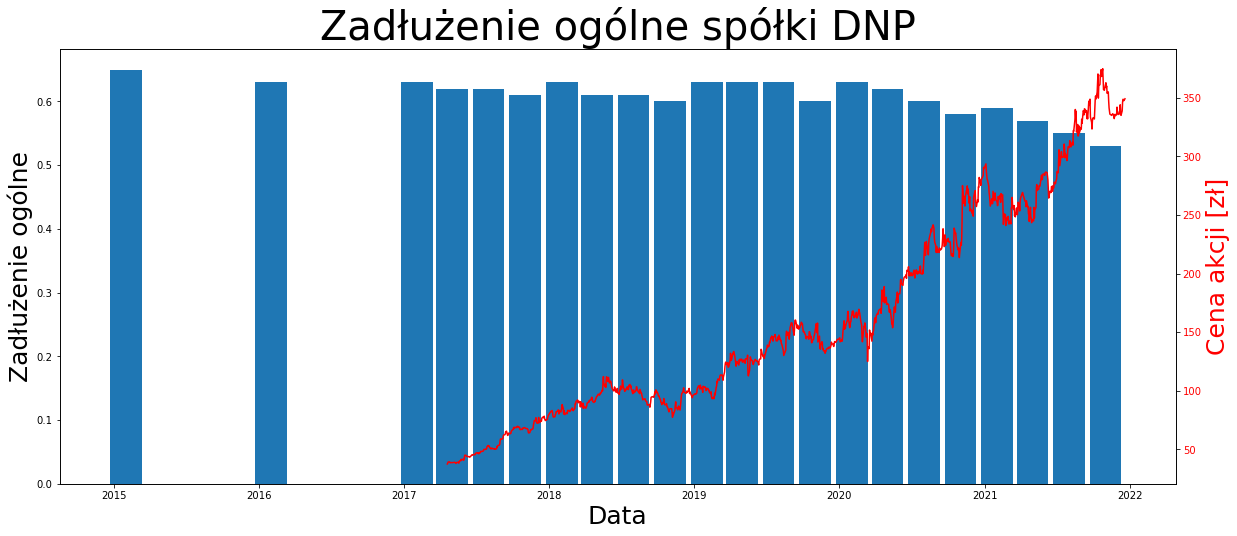

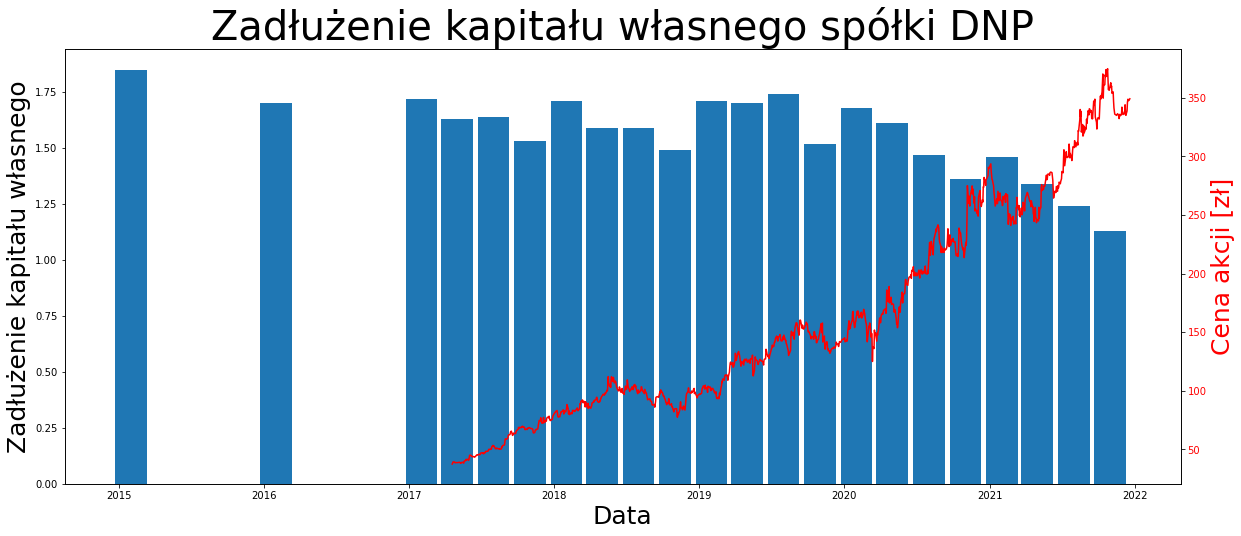

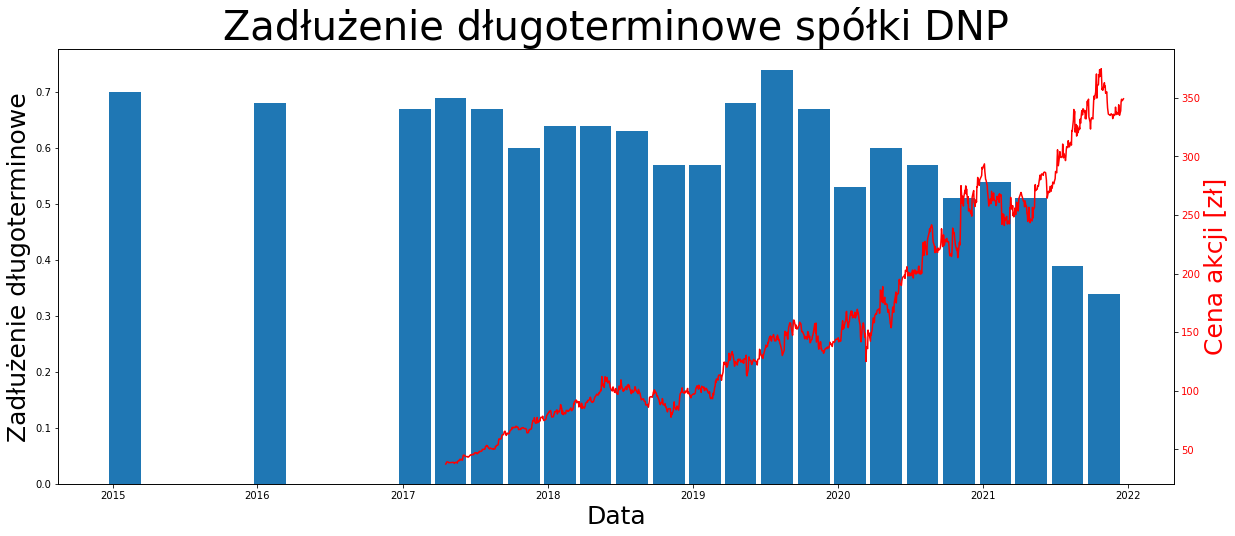

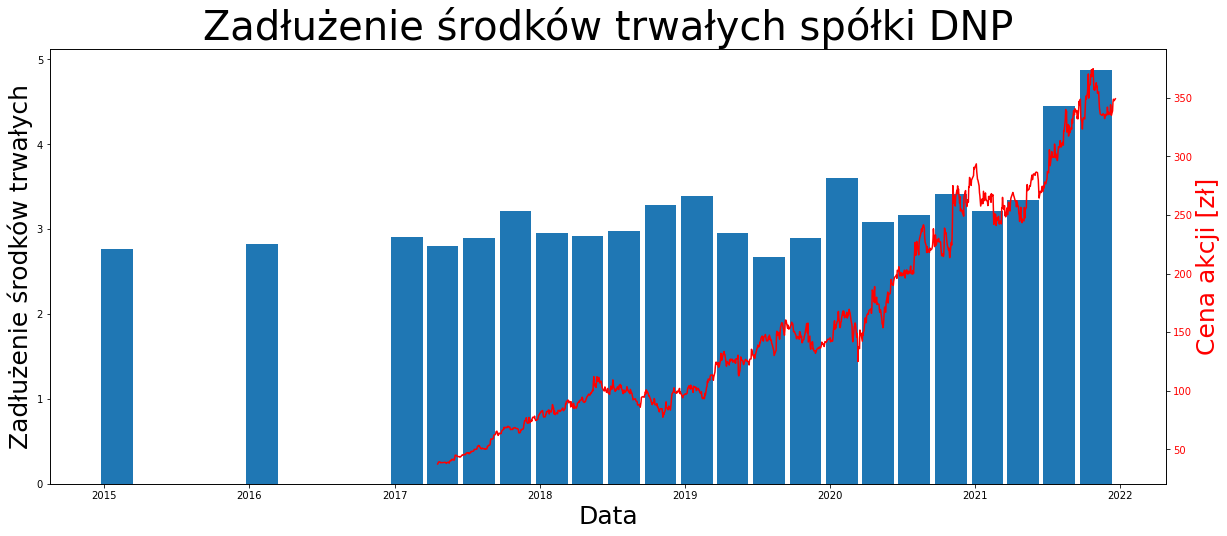

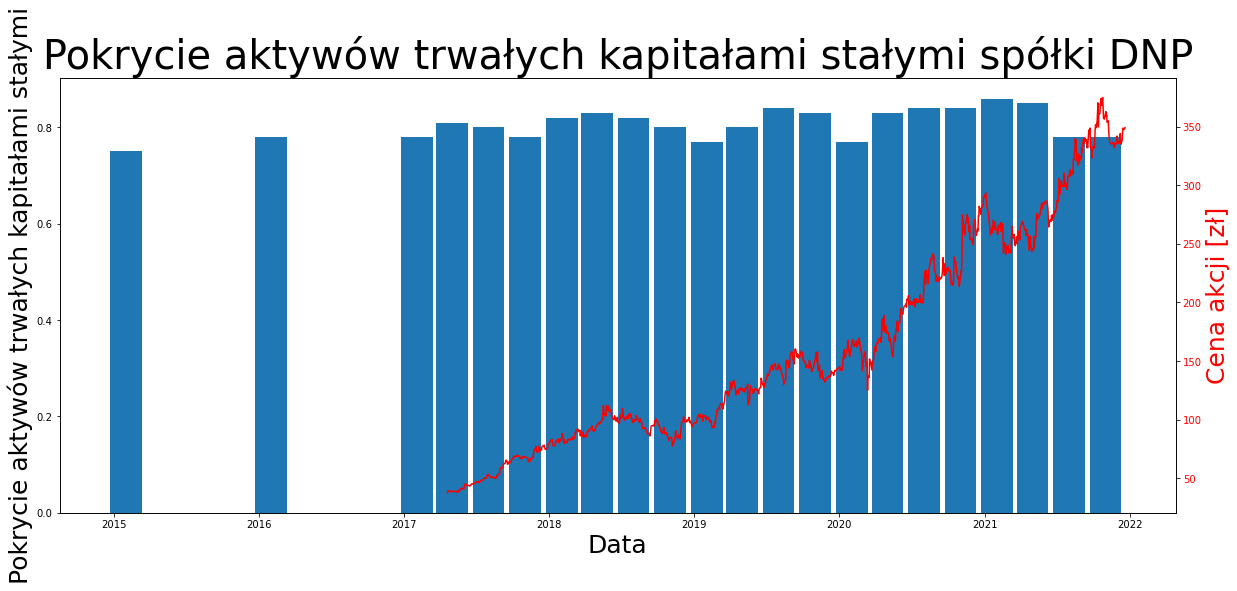

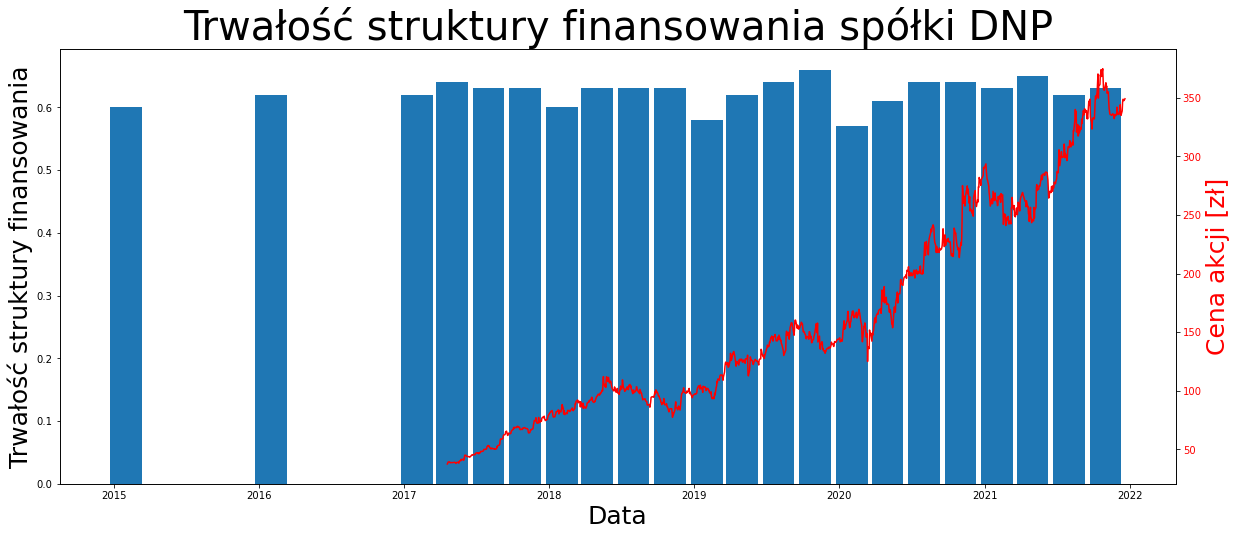

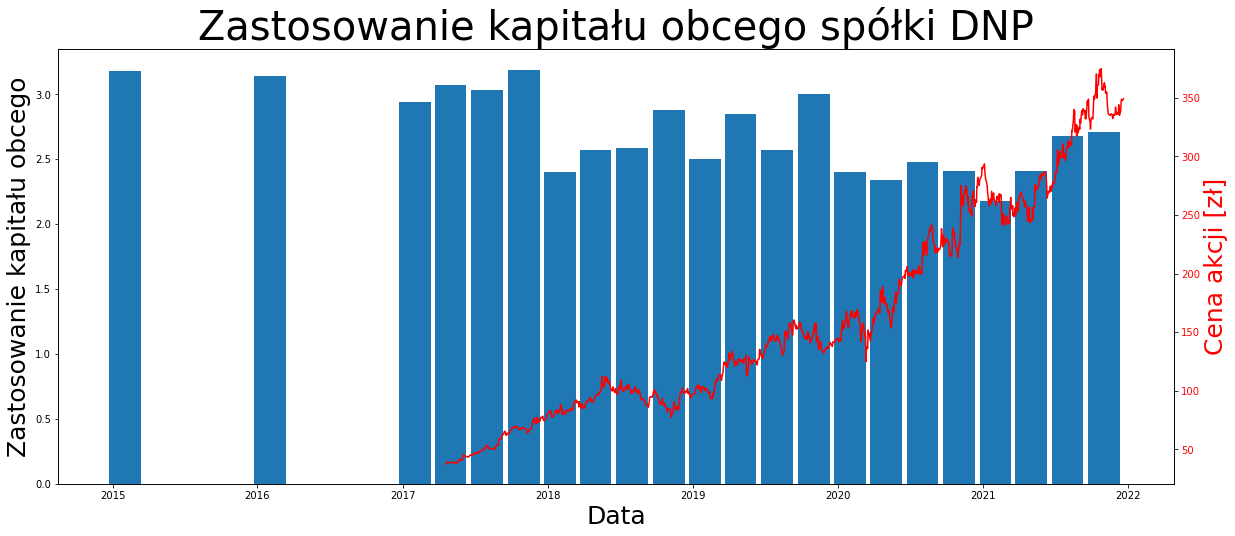

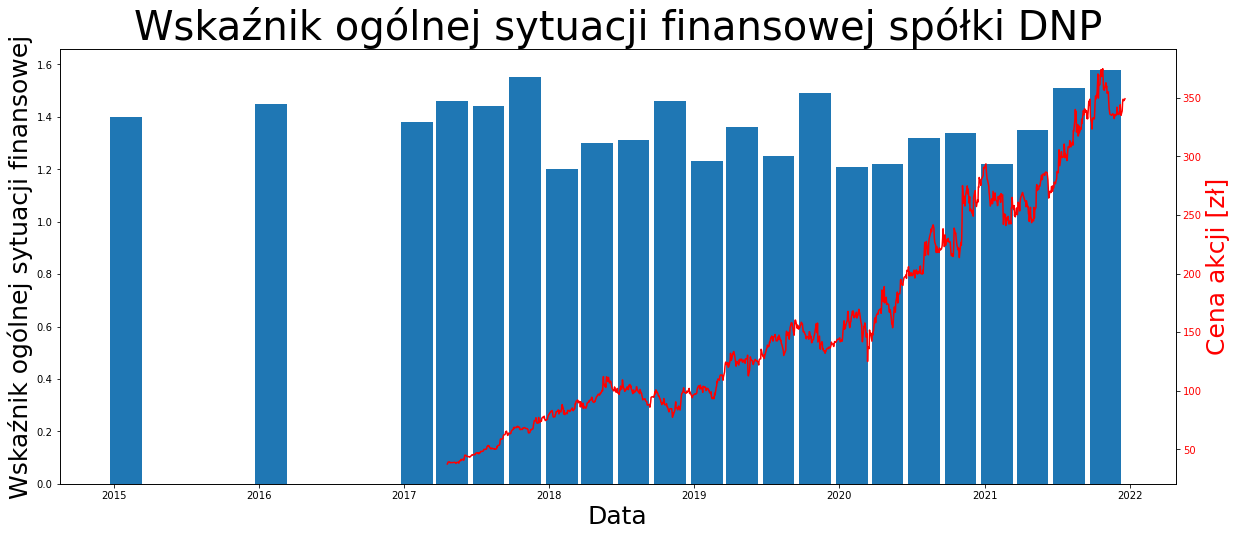

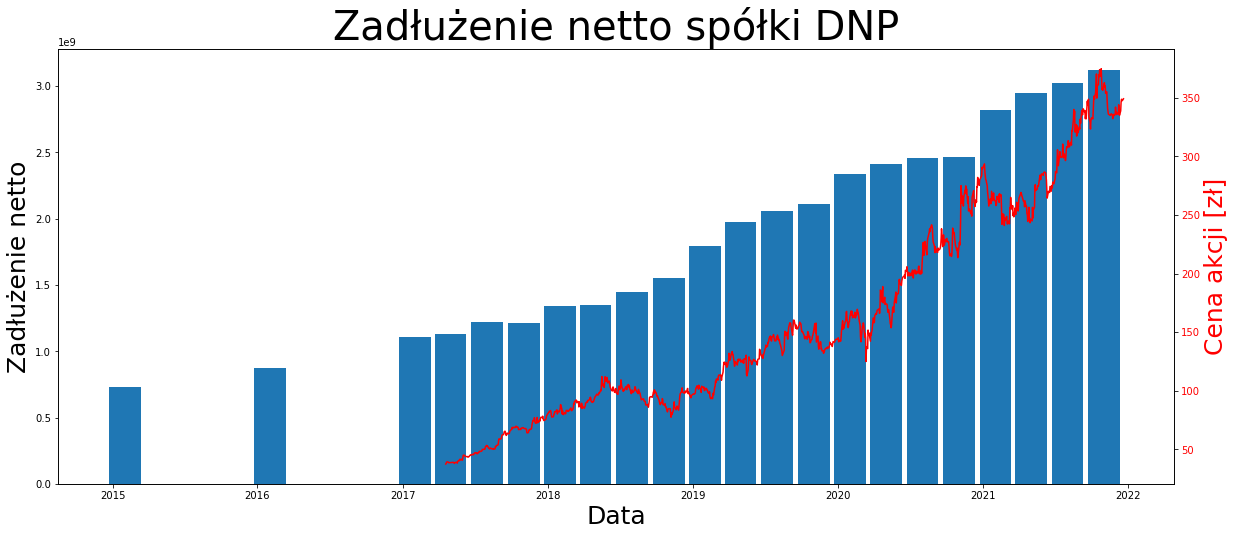

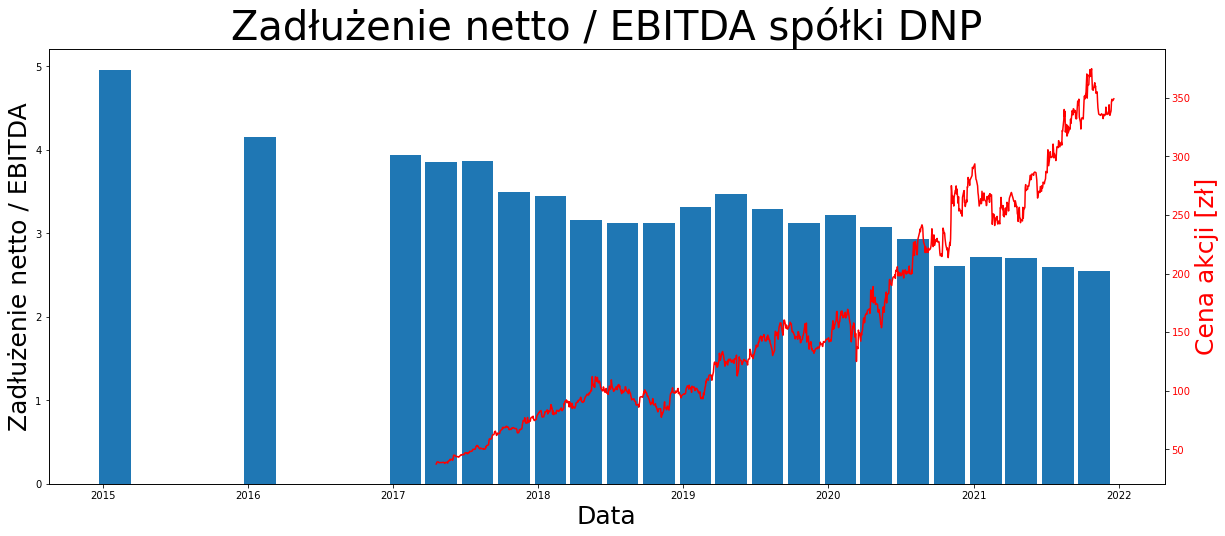

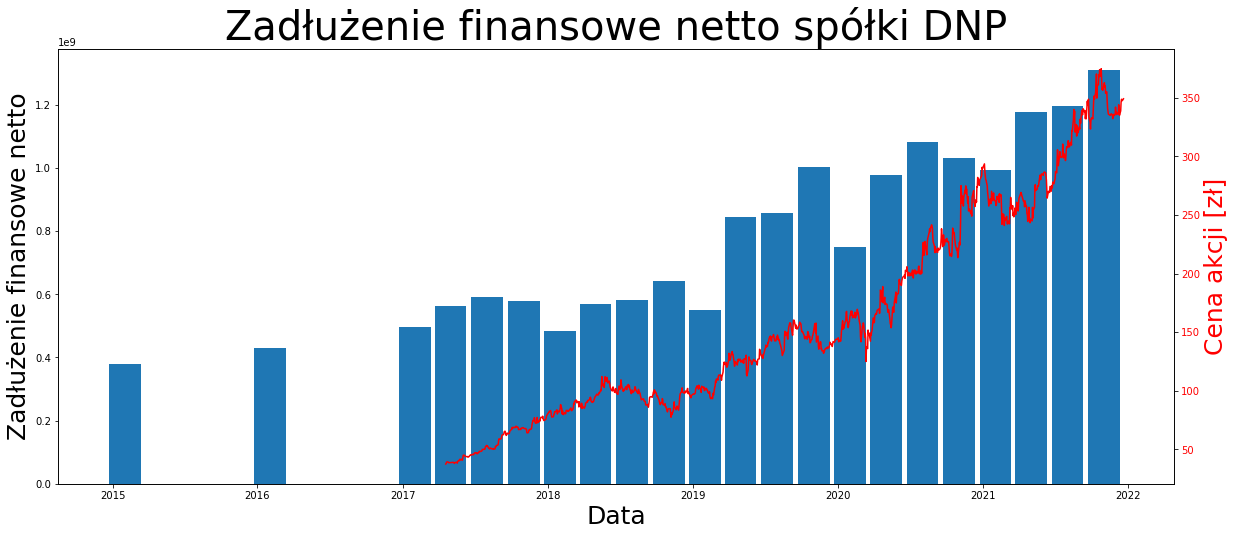

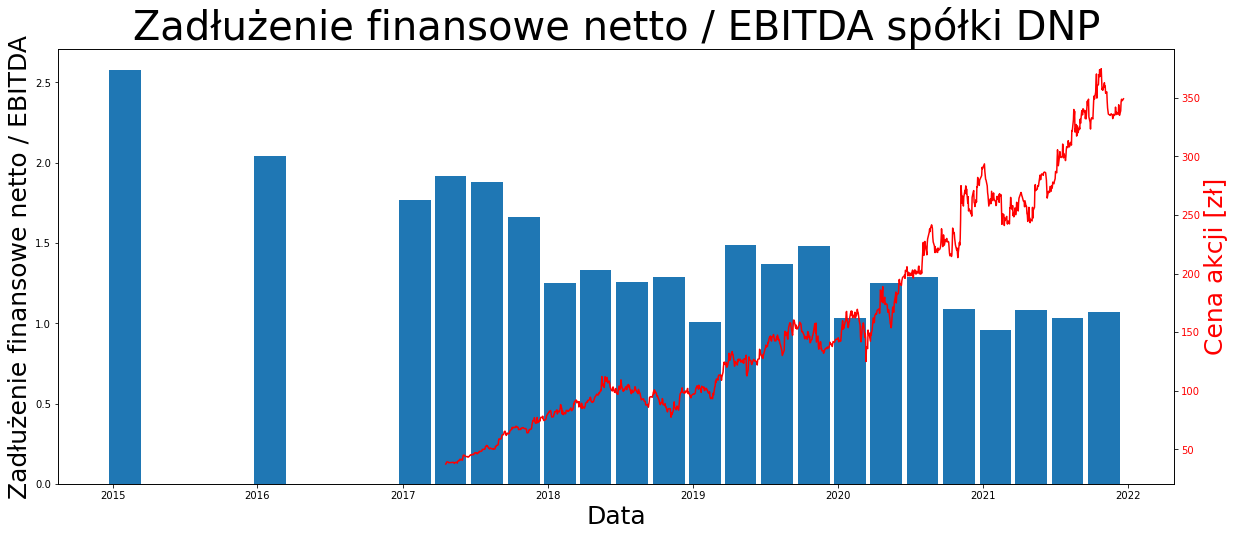

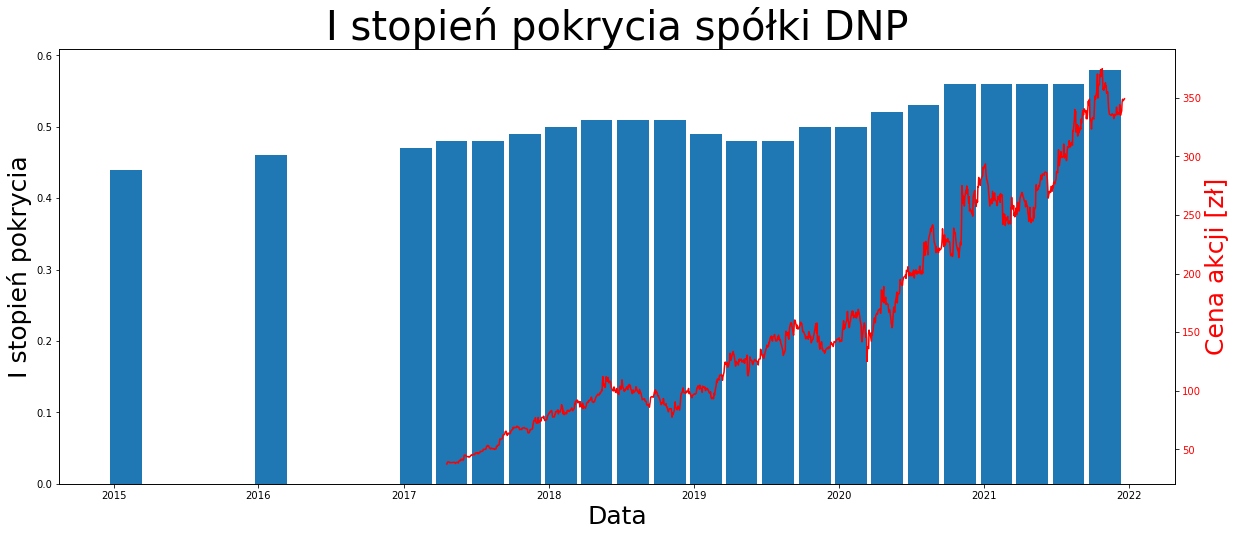

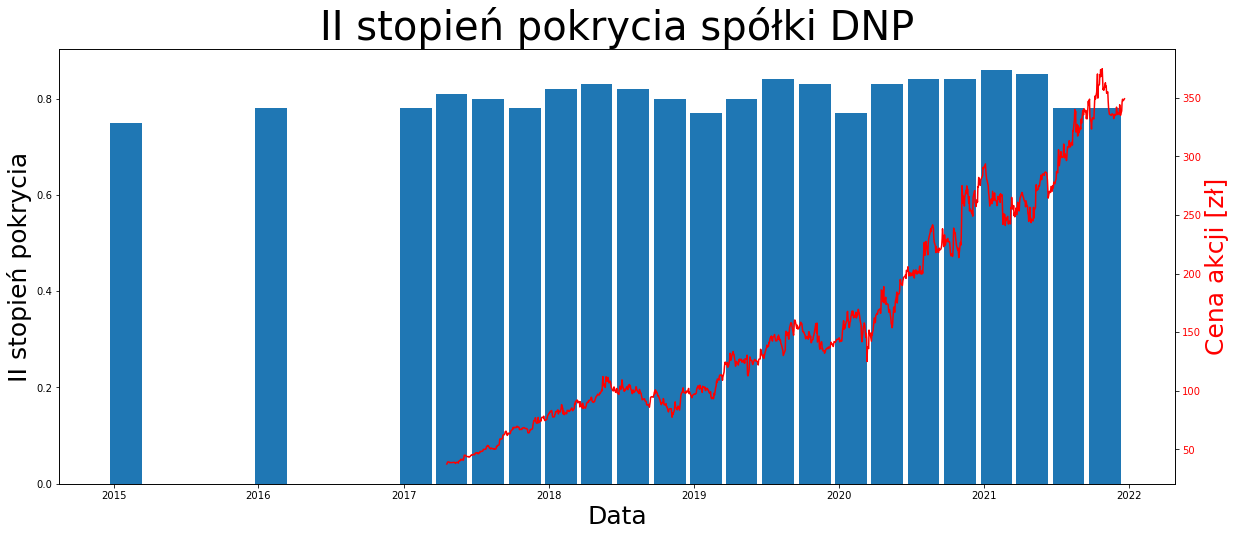

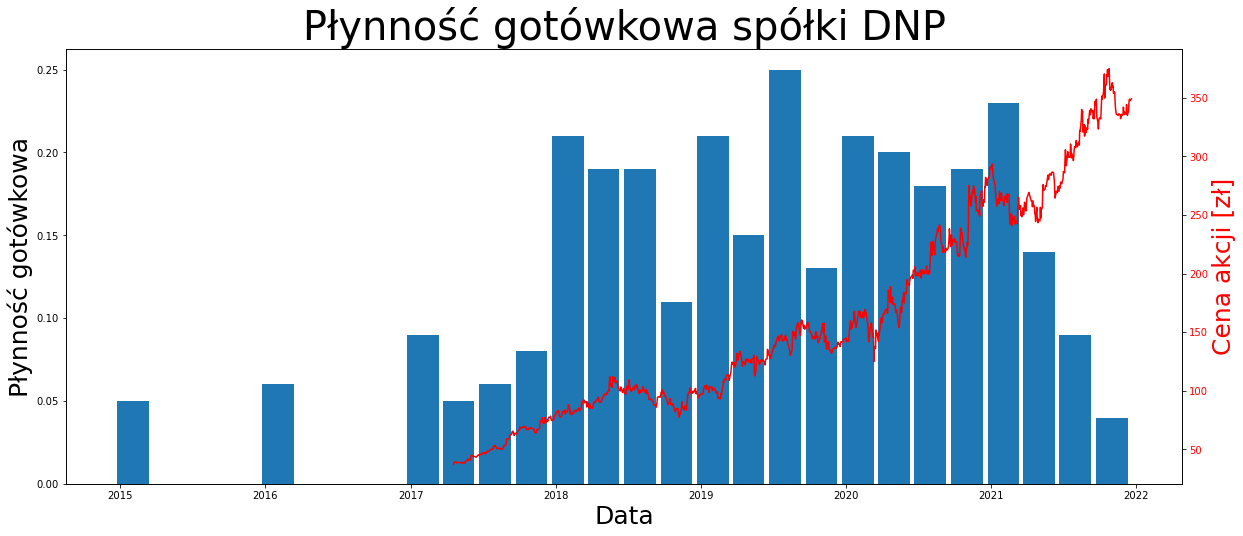

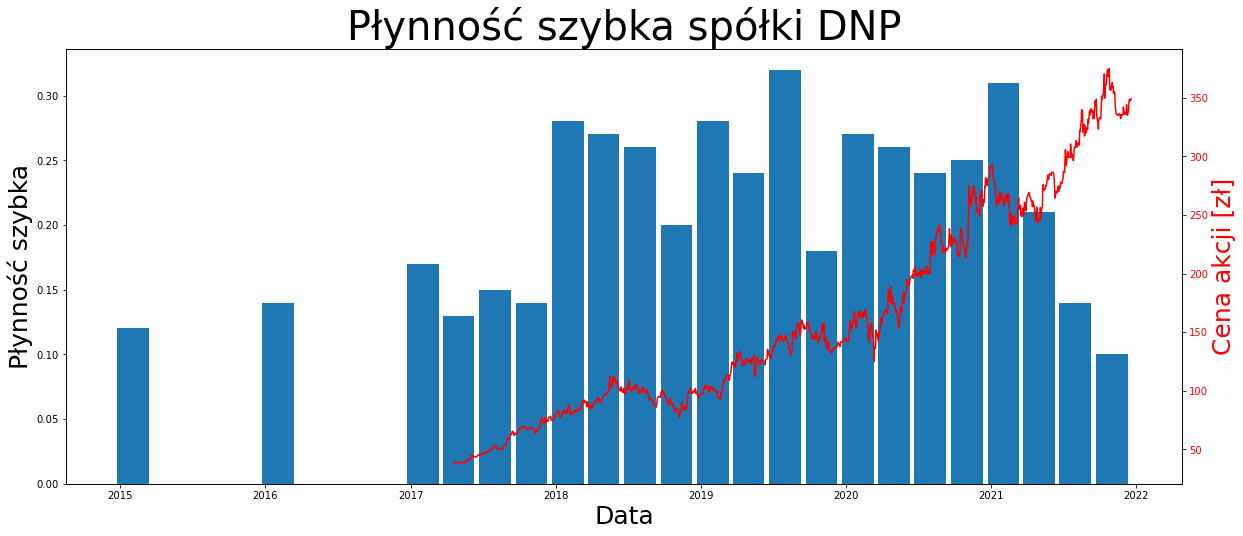

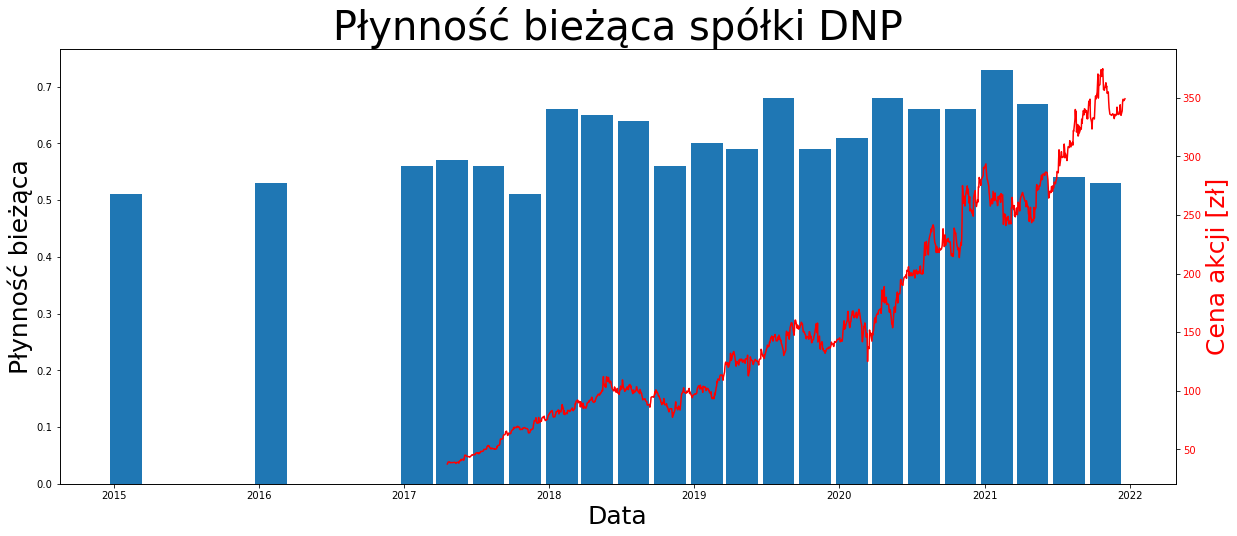

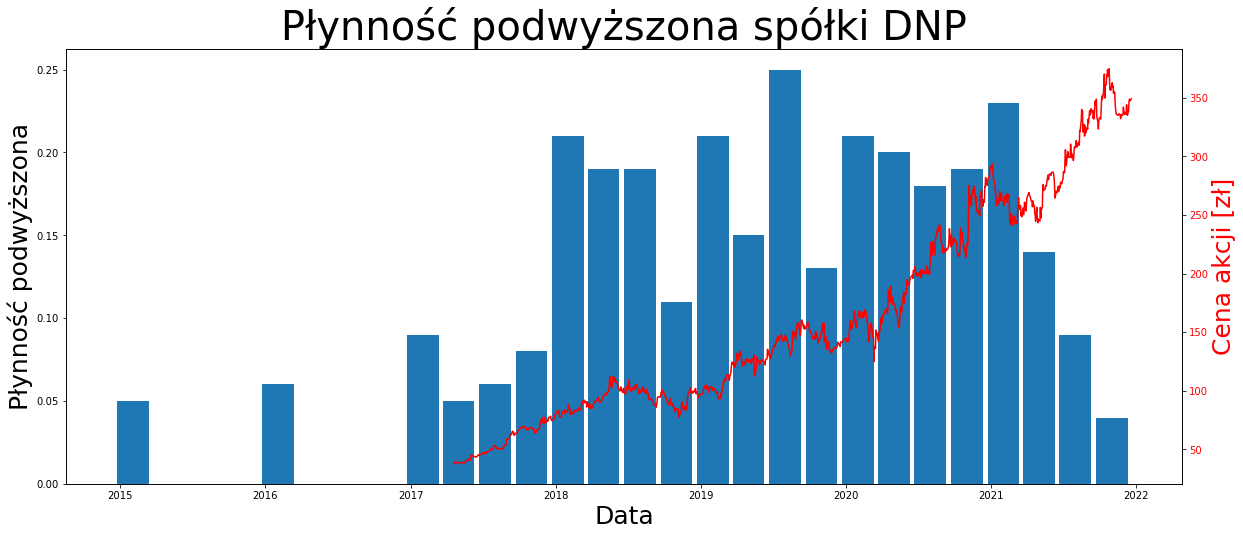

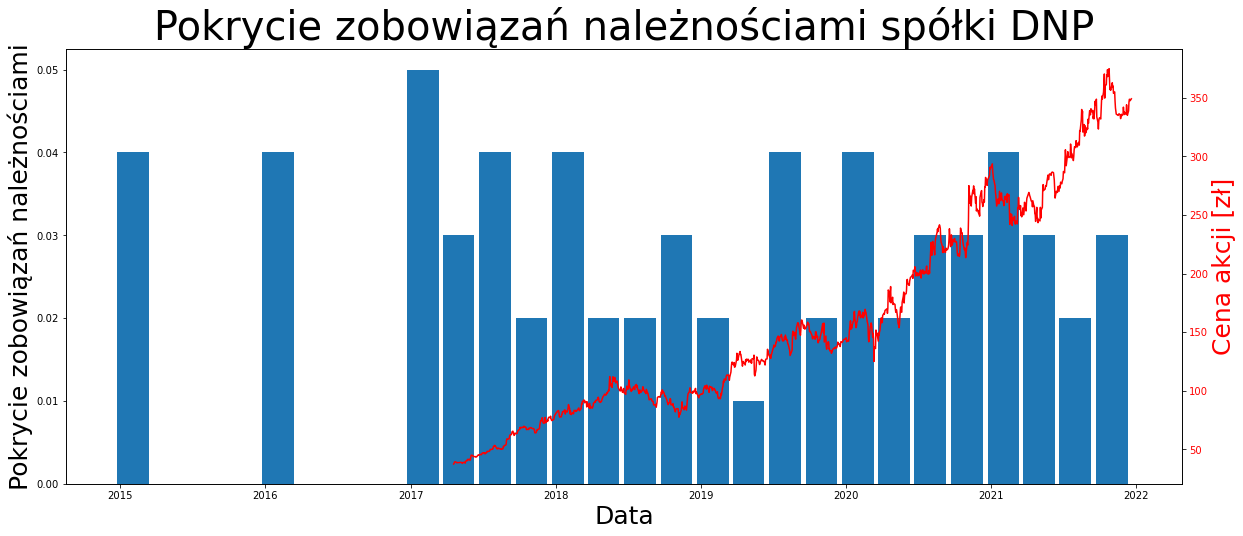

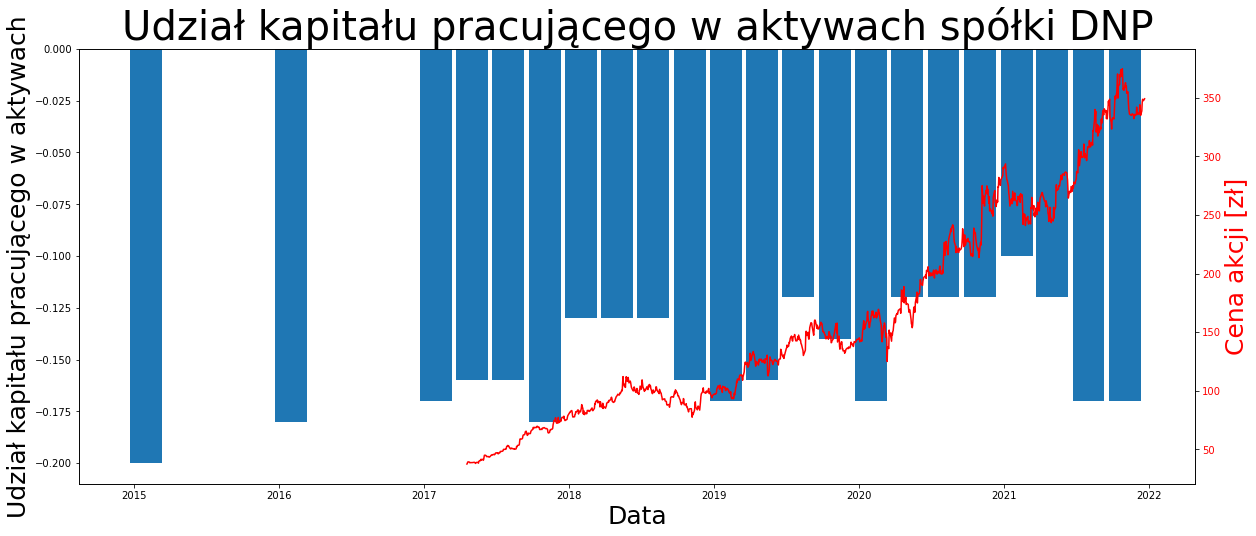

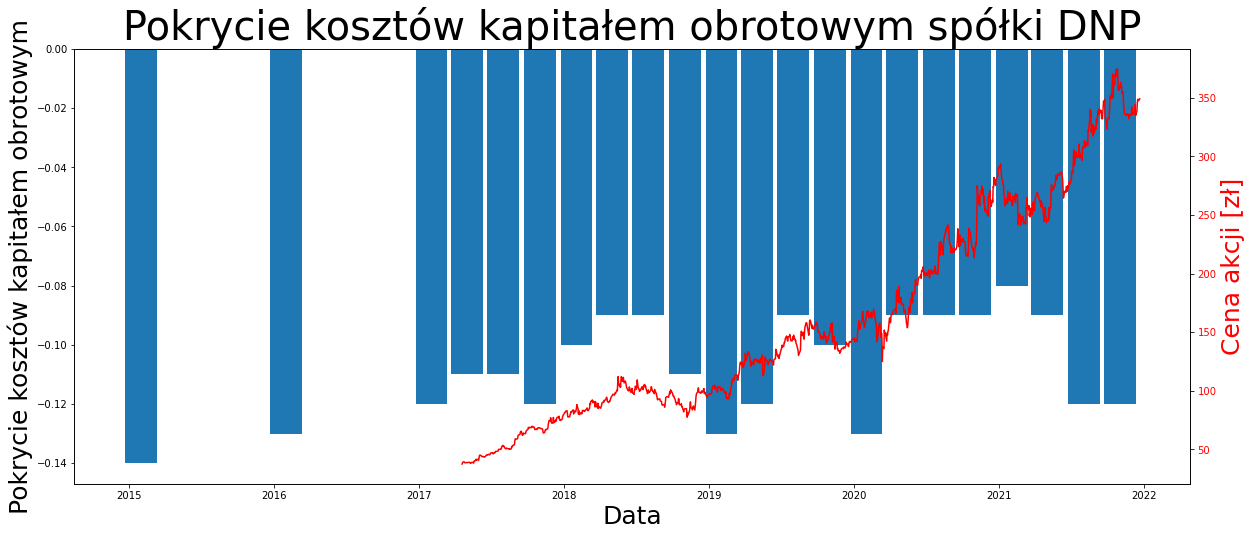

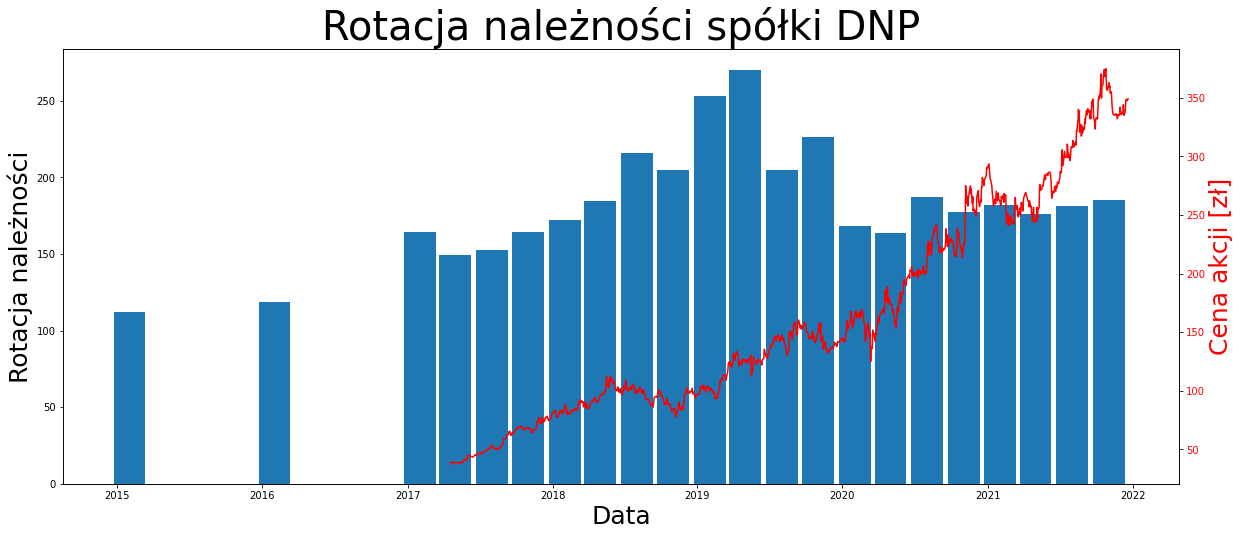

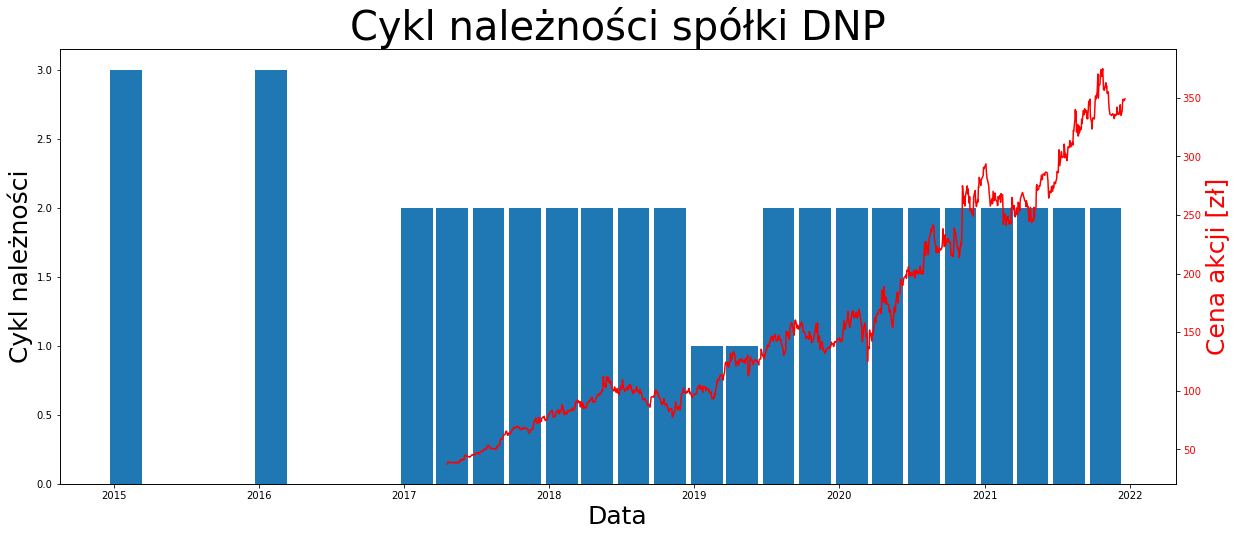

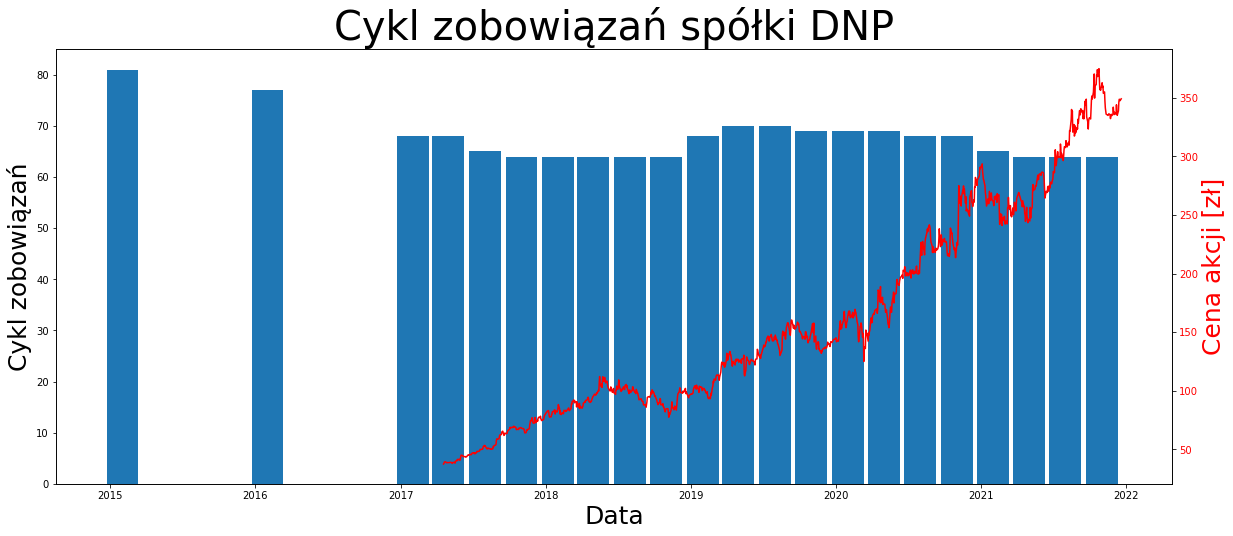

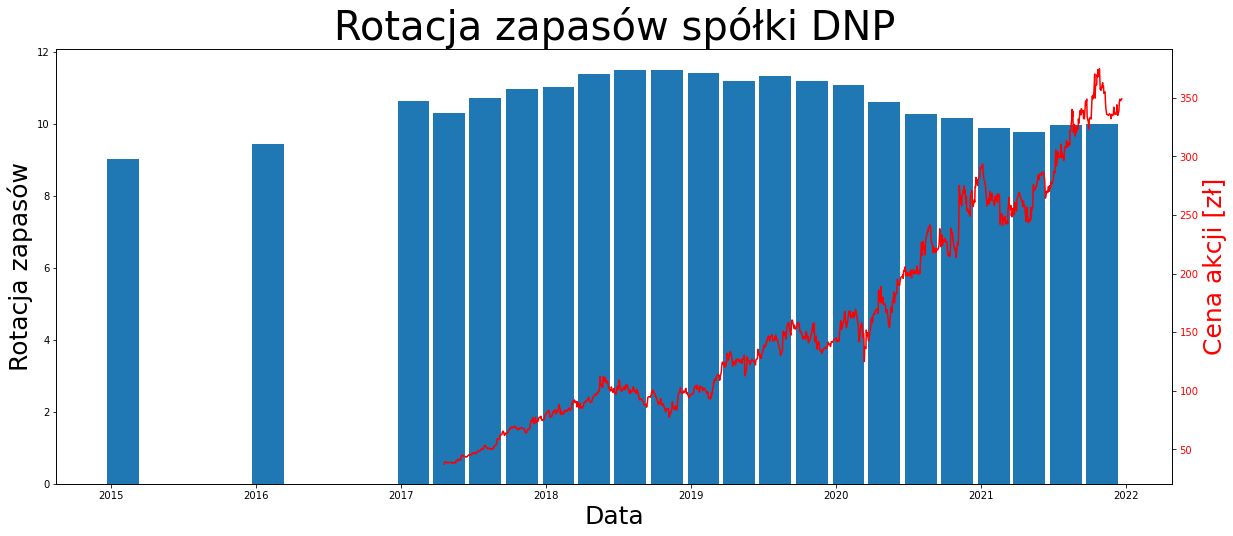

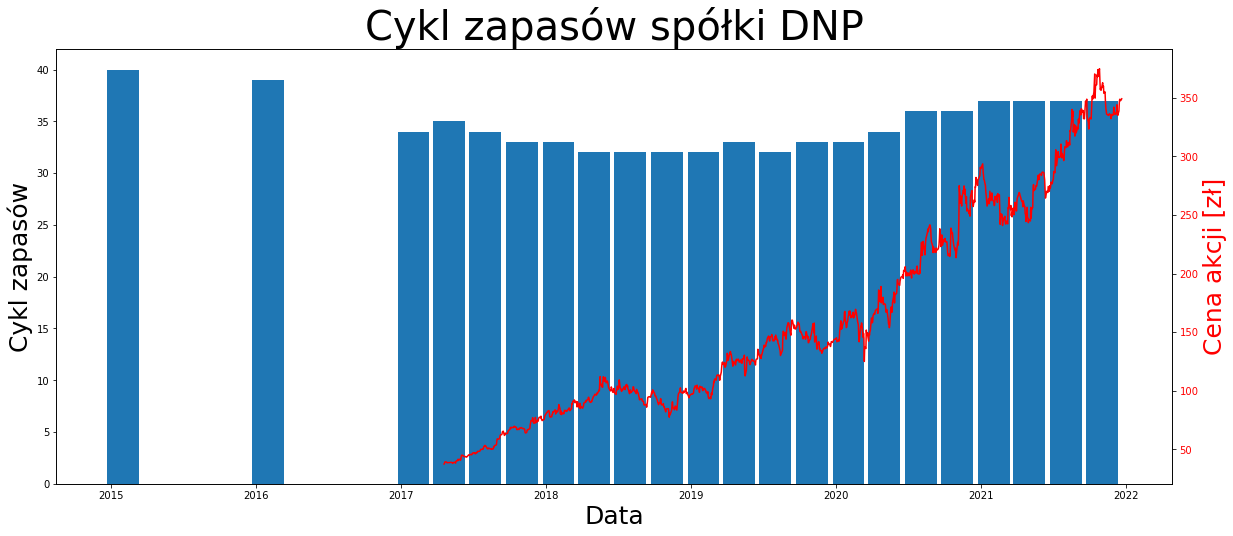

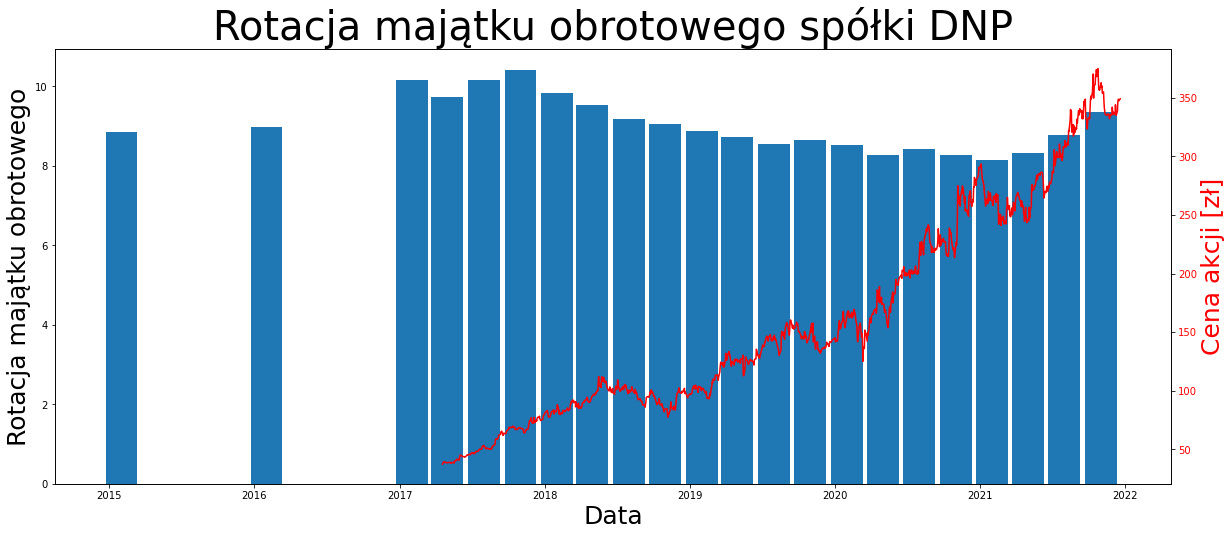

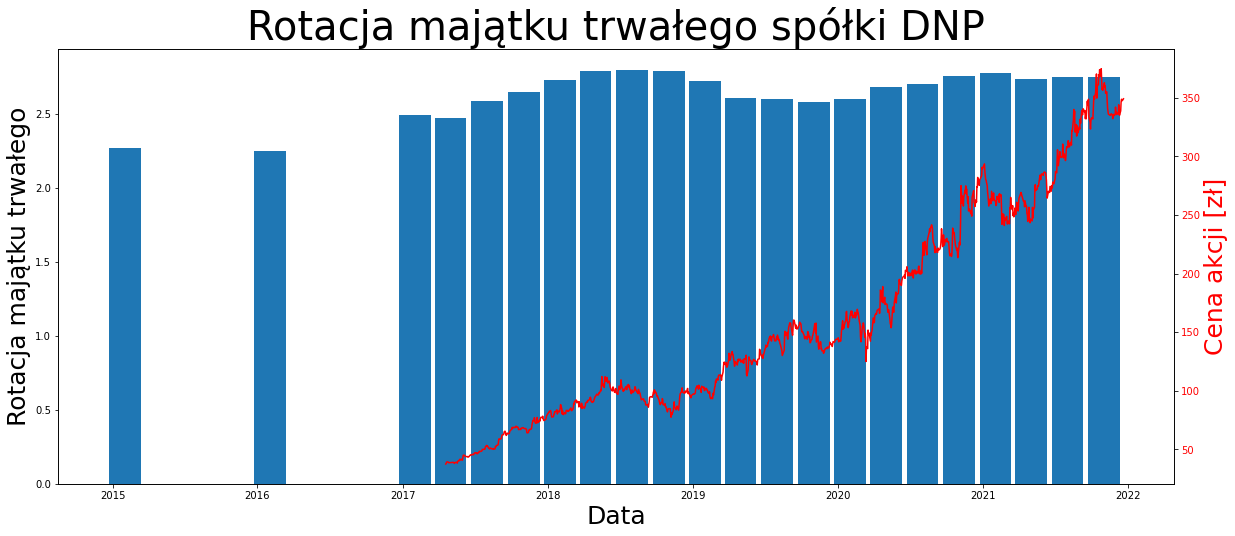

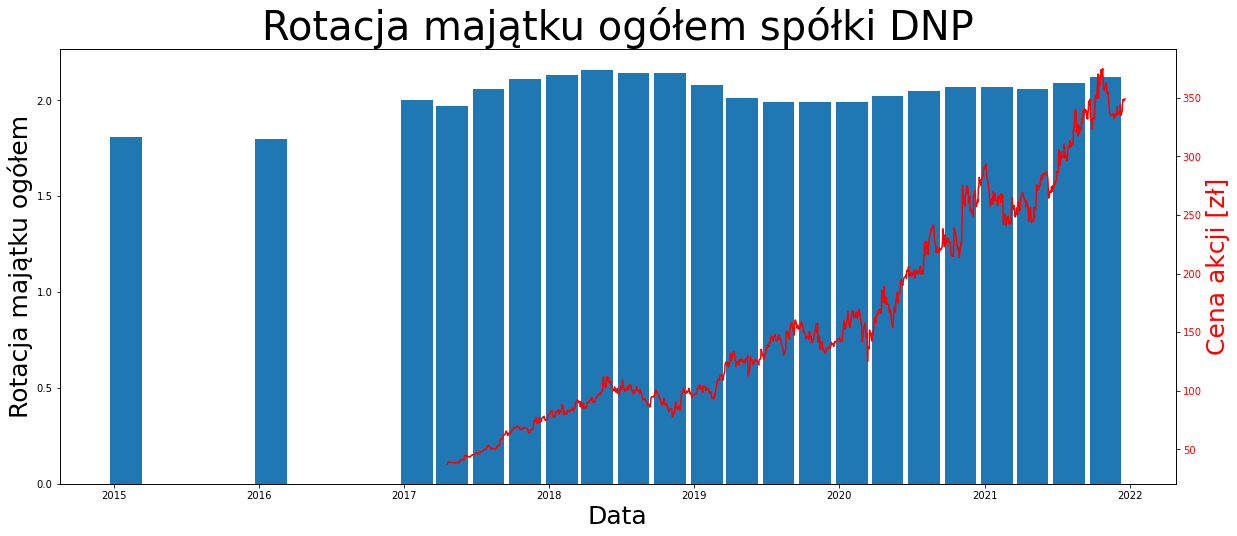

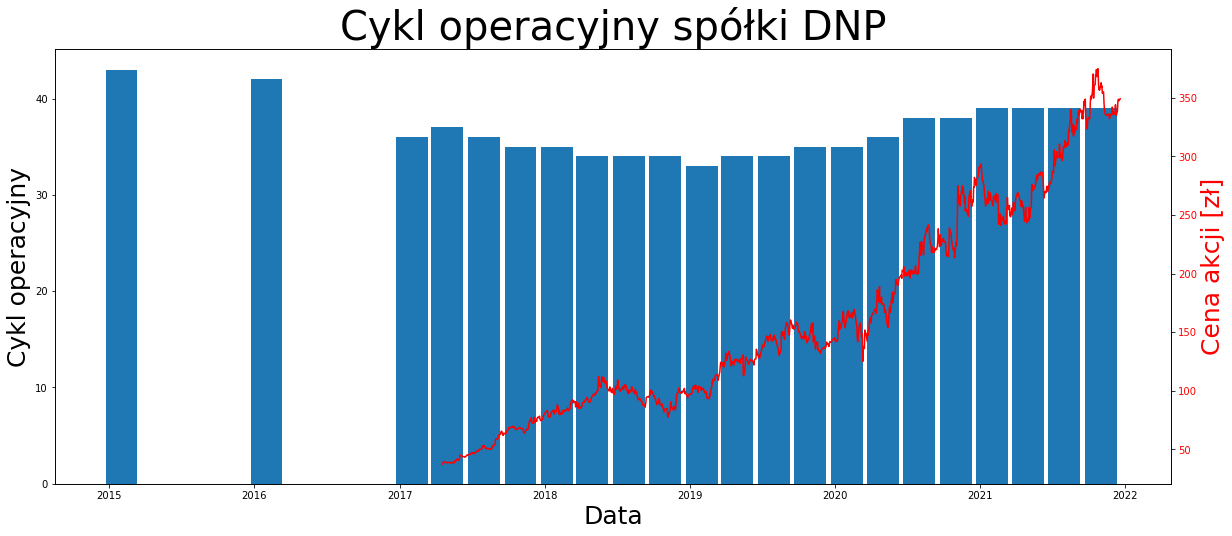

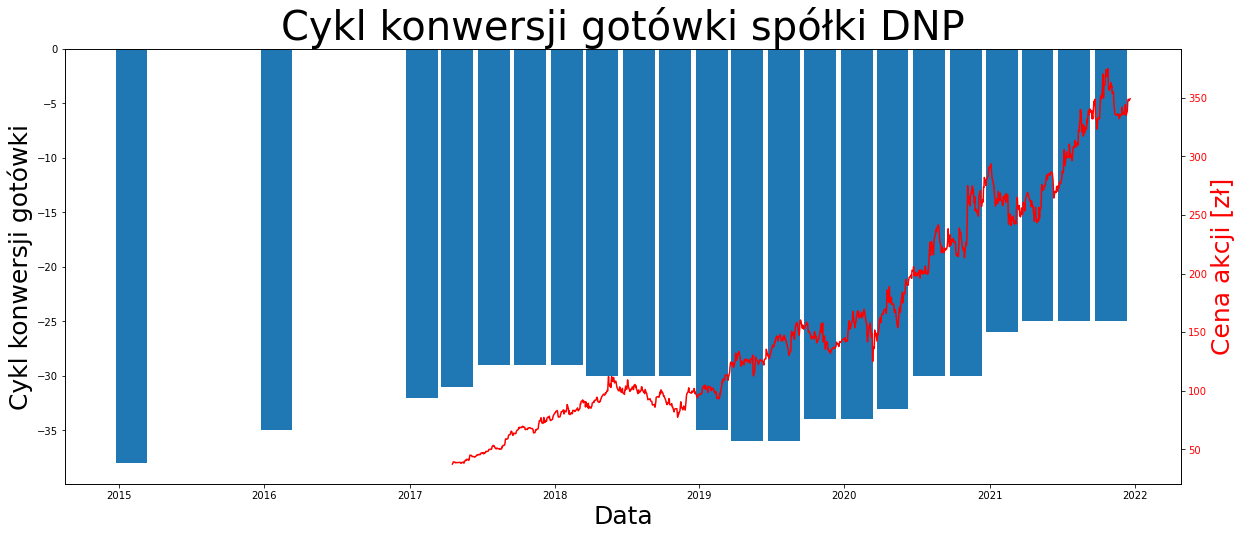

In [13]:
stock = 'DNP'
for indicator in fundamental_data.columns[2:-1]:
    plot_fundamental_indicators(stock, indicator)

In [20]:
fundamental_data.tail()

Spółka Kwartały  Wartość księgowa   Cena/WK  Zysk na akcję  Cena/Zysk  \
1229    AVG  2020/Q3        127.989048  3.680500       7.614286  27.437692   
1230    AVG  2020/Q4        131.355238  3.888571      -0.238571  49.302143   
1231    AVG  2021/Q1        134.185238  8.944762      12.148095  28.861250   
1232    AVG  2021/Q2        127.482857  3.062857      26.250952  21.399412   
1233    AVG  2021/Q3        146.060476  2.763810      35.799524  15.322941   

        Przychód  Cena/Przychód  Zysk operacyjny  Cena/Zysk operacyjny  ...  \
1229  298.785238       3.893000        18.247143             20.641333  ...   
1230  265.164762       2.698095        11.440476             21.588667  ...   
1231  297.970476       2.118095        23.100000             14.190625  ...   
1232  342.032381       2.257143        39.000952             12.519412  ...   
1233  383.296667       2.198571        52.407619             36.451111  ...   

      Cykl należności  Cykl zobowiązań  Rotacja zapasów  Cykl zapasów  \
1229      1020.095238      1528.285714        17.710625       61.6250   
1230      1081.333333      1648.476190        18.042500       60.2500   
1231      1123.047619      1752.333333        17.550625       61.5625   
1232      1141.476190      1790.047619        17.151875       59.5000   
1233      1139.476190      1785.047619        16.577500       59.6250   

      Rotacja majątku obrotowego  Rotacja majątku trwałego  \
1229                    2.780000                  1.507059   
1230                    2.761765                  1.747647   
1231                    2.699412                  1.822941   
1232                    2.740588                  1.872353   
1233                    2.738235                  1.790000   

      Rotacja majątku ogółem  Cykl operacyjny  Cykl konwersji gotówki  \
1229                0.649524         108.8125                -14.6875   
1230                0.672381         106.5000                -12.1250   
1231                0.658095         106.8125                -12.8125   
1232                0.673810         103.5625                -11.3750   
1233                0.681429         104.0000                 -8.4375   

           Data  
1229 2020-11-01  
1230 2021-02-01  
1231 2021-05-01  
1232 2021-08-01  
1233 2021-11-01  

[5 rows x 58 columns]